<div style="background: radial-gradient(circle, #84fab0, #8fd3f4); color: #2c3e50; padding: 20px; border-radius: 15px; font-size: 30px; font-weight: bold; font-family: 'Poppins', sans-serif; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2); text-align: center; border: 1px solid #2c3e50; position: relative;">
    <strong>--Employee Performance Analysis - INX Future Inc.--</strong>
    <div style="font-size: 22px; font-weight: bold; margin-top: 5px;">
        <strong></strong>
    </div>
    <span style="position: absolute; bottom: 10px; right: 15px; font-size: 18px; font-weight: bold; color: #2c3e50;">
        <strong>Date:</strong> 04/03/2025
    </span>
</div>

</div>

</div>

</div>

</div>


<div style="background-color: #eef2f7; color: #333; padding: 25px; border-radius: 10px; font-size: 18px; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.15); border-left: 8px solid #0073e6; font-family: Arial, sans-serif;">
    <h1 style="color: #0056b3; text-align: center;">Project Summary</h1>    
    <h2 style="color: #004080;">Introduction</h2>
    <p>In today’s competitive business environment, organizations must continuously assess and optimize employee performance to drive productivity and growth. <b>INX Future Inc.</b> aims to leverage data-driven insights to enhance workforce efficiency, identify key performance drivers, and streamline hiring decisions. By utilizing machine learning models and analytics, the company seeks to improve employee retention, optimize workforce productivity, and make informed hiring decisions that align with strategic business objectives.</p>    
    <h2 style="color: #004080;">Business Problem</h2>
    <p>Employee performance directly impacts business success, but traditional evaluation methods are often subjective and inconsistent. INX Future Inc. faces challenges in:</p>
    <ul>
        <li>Identifying key factors that influence employee productivity.</li>
        <li>Understanding department-wise variations in performance.</li>
        <li>Predicting employee performance for better hiring and training programs.</li>
        <li>Reducing attrition and improving retention strategies.</li>
    </ul>
    <p>The <b>Employee Performance Analysis project</b> aims to uncover key factors affecting employee performance and develop a predictive model to assist in workforce management and hiring decisions.</p>   
    <h2 style="color: #004080;">Key Objectives</h2>
    <ul>
        <li><b>Department-wise Performance Analysis</b> – Understanding variations in employee performance across different departments.</li>
        <li><b>Identifying Top Factors</b> – Determining the top three factors that significantly impact employee performance.</li>
        <li><b>Predictive Modeling</b> – Training a machine learning model to forecast employee performance based on various attributes.</li>
        <li><b>Strategic Recommendations</b> – Providing actionable insights to improve employee engagement, efficiency, and retention.</li>
    </ul>    
    <h2 style="color: #004080;">Planned Methodology</h2>
    <ul>
        <li><b>Data Collection:</b> Employee records, performance metrics, and HR data.</li>
        <li><b>Data Processing:</b> Cleaning data, handling missing values, and performing feature engineering.</li>
        <li><b>Exploratory Data Analysis (EDA):</b> Identifying patterns, correlations, and trends in employee performance.</li>
        <li><b>Feature Selection:</b> Using statistical methods and domain expertise to select relevant performance predictors.</li>
        <li><b>Model Training:</b> Implementing and evaluating different ML models, such as Random Forest and XGBoost, to achieve optimal accuracy.</li>
        <li><b>Insights & Recommendations:</b> Interpreting results to provide HR strategies for performance improvement.</li>
    </ul>   
    <h2 style="color: #004080;">Expected Outcomes</h2>
    <ul>
        <li>Improved understanding of key factors influencing employee performance.</li>
        <li>A trained predictive model to support hiring and workforce planning.</li>
        <li>Data-driven recommendations to enhance employee engagement and productivity.</li>
    </ul>    
    <h2 style="color: #004080;">Industry Benchmarks and HR Metrics</h2>
    <ul>
        <li><b>Society for Human Resource Management (SHRM):</b> Offers toolkits for benchmarking HR metrics, aiding in the improvement of workforce practices.</li>
        <li><b>APQC:</b> Provides key benchmarks for HR functions, including personnel costs and employee turnover rates.</li>
        <li><b>Bureau of Labor Statistics (BLS):</b> Publishes employment trends, job openings, and labor turnover data, serving as valuable benchmarks.</li>
        <li><b>Employee Retention Sources:</b> Reports from organizations such as Nobscot Corporation and Apollo Technical highlight employee retention trends and industry-specific challenges.</li>
    </ul>
</div>


In [29]:
import pickle   
import pandas as pd
import numpy as np
%config NotebookNotary.db_file = ':memory:'
import pymysql
from sklearn.model_selection import train_test_split 
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from scipy import stats
from scipy.stats.mstats import winsorize
from imblearn.over_sampling import SMOTE  
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score,classification_report

import warnings
warnings.filterwarnings('ignore')

In [31]:
df = pd.read_excel(r"C:\Users\pooji\DS-project\IABAC\INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")

<div style="background-color: #e3f2fd; color: #0d47a1; padding: 15px; border-radius: 8px; font-size: 36px; font-weight: bold; text-align: center; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);">
   Data Preprocessing & Data Cleaning
</div>


<div style="background-color: #f0f8ff; color: #005f73; padding: 10px; border-radius: 5px;font-size: 40px;">
   Loading & Previewing Data
</di>

In [35]:
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [37]:
df.shape

(1200, 28)

In [39]:
df.size

33600

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [120]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1200.0,36.918333,9.087289,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1200.0,9.165833,8.176636,1.0,2.0,7.0,14.0,29.0
EmpEducationLevel,1200.0,2.892500,1.044120,1.0,2.0,3.0,4.0,5.0
EmpEnvironmentSatisfaction,1200.0,2.715833,1.090599,1.0,2.0,3.0,4.0,4.0
EmpHourlyRate,1200.0,65.981667,20.211302,30.0,48.0,66.0,83.0,100.0
EmpJobInvolvement,1200.0,2.731667,0.707164,1.0,2.0,3.0,3.0,4.0
EmpJobLevel,1200.0,2.067500,1.107836,1.0,1.0,2.0,3.0,5.0
EmpJobSatisfaction,1200.0,2.732500,1.100888,1.0,2.0,3.0,4.0,4.0
NumCompaniesWorked,1200.0,2.665000,2.469384,0.0,1.0,2.0,4.0,9.0
EmpLastSalaryHikePercent,1200.0,15.222500,3.625918,11.0,12.0,14.0,18.0,25.0


<div style="background-color: #f0f8ff; color: #005f73; padding: 10px; border-radius: 5px;font-size: 40px;">
   Handling Missing Values
</di>

In [123]:
df.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

<div style="background-color: #f0f8ff; color: #005f73; padding: 10px; border-radius: 5px;font-size: 40px;">
   Identifying & Removing Duplicates
</di>

In [126]:
df.duplicated().sum()

0

<div style="background-color: #f0f8ff; color: #005f73; padding: 10px; border-radius: 5px;font-size: 40px;">
   Analyzing Categorical and Numerical Features
</di>

In [129]:
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} unique values")

EmpNumber: 1200 unique values
Gender: 2 unique values
EducationBackground: 6 unique values
MaritalStatus: 3 unique values
EmpDepartment: 6 unique values
EmpJobRole: 19 unique values
BusinessTravelFrequency: 3 unique values
OverTime: 2 unique values
Attrition: 2 unique values


In [131]:
for col in df.select_dtypes(include=['int64']).columns:
    print(f"{col}: {df[col].nunique()} unique values")

Age: 43 unique values
DistanceFromHome: 29 unique values
EmpEducationLevel: 5 unique values
EmpEnvironmentSatisfaction: 4 unique values
EmpHourlyRate: 71 unique values
EmpJobInvolvement: 4 unique values
EmpJobLevel: 5 unique values
EmpJobSatisfaction: 4 unique values
NumCompaniesWorked: 10 unique values
EmpLastSalaryHikePercent: 15 unique values
EmpRelationshipSatisfaction: 4 unique values
TotalWorkExperienceInYears: 40 unique values
TrainingTimesLastYear: 7 unique values
EmpWorkLifeBalance: 4 unique values
ExperienceYearsAtThisCompany: 37 unique values
ExperienceYearsInCurrentRole: 19 unique values
YearsSinceLastPromotion: 16 unique values
YearsWithCurrManager: 18 unique values
PerformanceRating: 3 unique values


In [133]:
df.drop(columns=['EmpNumber'], inplace=True)

<div style="background-color: #f0f8ff; color: #005f73; padding: 10px; border-radius: 5px;font-size: 40px;">
   Drops EmpNumber, since it's a unique identifier and not useful for modeling.
</di>

In [136]:
for column in df.columns:
    print(f"Value counts for column '{column}':")
    print(df[column].value_counts())
    print("\n" + "-"*50 + "\n")

Value counts for column 'Age':
Age
34    71
35    64
36    60
31    57
29    51
38    48
32    46
40    46
33    46
27    43
30    42
37    41
28    39
45    36
42    36
26    33
41    32
39    31
44    30
50    28
43    26
46    24
25    24
49    21
24    20
47    20
55    17
54    16
48    16
52    15
53    15
22    15
51    14
56    11
21    11
58    11
23     9
19     8
18     8
20     6
59     6
57     4
60     3
Name: count, dtype: int64

--------------------------------------------------

Value counts for column 'Gender':
Gender
Male      725
Female    475
Name: count, dtype: int64

--------------------------------------------------

Value counts for column 'EducationBackground':
EducationBackground
Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: count, dtype: int64

--------------------------------------------------

Value counts for column 'MaritalStatus':
MaritalStatus
Marrie

<div style="background-color: #eef2f7; color: #333; padding: 25px; border-radius: 10px; font-size: 18px; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.15); border-left: 8px solid #0073e6; font-family: Arial, sans-serif;">
    <h1 style="color: #0056b3; text-align: center;">Demographic & Workforce Insights</h1>    
    <h2 style="color: #004080;">Demographic Distribution</h2>
    <ul>
        <li><b>Age:</b> Mostly in their 30s-40s (peak: 34-36 years). Youngest: 18, Oldest: 60.</li>
        <li><b>Gender:</b> 60.4% Male, 39.6% Female.</li>
        <li><b>Marital Status:</b> Mostly married (548), followed by single (384) and divorced (268).</li>
        <li><b>Education:</b> Dominated by Life Sciences (492) & Medical (384). HR (21) is the least common.</li>
    </ul>    
    <h2 style="color: #004080;">Job & Work Insights</h2>
    <ul>
        <li><b>Departments:</b> Sales (373), Development (361), R&D (343) are the largest. Data Science (20) is the smallest.</li>
        <li><b>Job Roles:</b> Sales Executive (270) & Developer (236) are the most common. Data Scientist (20) is among the smallest.</li>
        <li><b>Business Travel:</b> Most travel rarely (846), only 222 travel frequently.</li>
        <li><b>Overtime:</b> Majority (847) do not work overtime.</li>
    </ul>    
    <h2 style="color: #004080;">Experience & Career Progression</h2>
    <ul>
        <li><b>Education Level:</b> Mostly at Level 3 (449) & 4 (322). Few (42) at Level 5 (likely PhDs).</li>
        <li><b>Work Experience:</b> Most have 10+ years. Many had previous jobs before joining.</li>
        <li><b>Job Involvement & Satisfaction:</b> Mostly moderate (Involvement 3: 724, Satisfaction 4: 378).</li>
        <li><b>Promotions & Managerial Experience:</b> 469 employees had no recent promotion. Many (281) have been with their manager for 2 years.</li>
    </ul>    
    <h2 style="color: #004080;">Salary & Performance</h2>
    <ul>
        <li><b>Salary Hike:</b> Mostly 11%-14% increases. Few (13) got a 25% hike.</li>
        <li><b>Performance:</b> Majority rated 3 (874). Only 132 received the highest rating (4).</li>
    </ul>    
    <h2 style="color: #004080;">Attrition</h2>
    <ul>
        <li><b>Attrition Rate:</b> 14.8% (178 left, 1022 stayed). Moderate turnover.</li>
    </ul>    
</div>


<div style="background-color: #e3f2fd; color: #0d47a1; padding: 15px; border-radius: 8px; font-size: 36px; font-weight: bold; text-align: center; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);">
   Exploratory Data Analysis (EDA)
</div>

                            mean  median  count       std  min  max
EmpDepartment                                                      
Development             3.085873     3.0    361  0.388508    2    4
Data Science            3.050000     3.0     20  0.394034    2    4
Human Resources         2.925926     3.0     54  0.544331    2    4
Research & Development  2.921283     3.0    343  0.559016    2    4
Sales                   2.860590     3.0    373  0.555400    2    4
Finance                 2.775510     3.0     49  0.586846    2    4


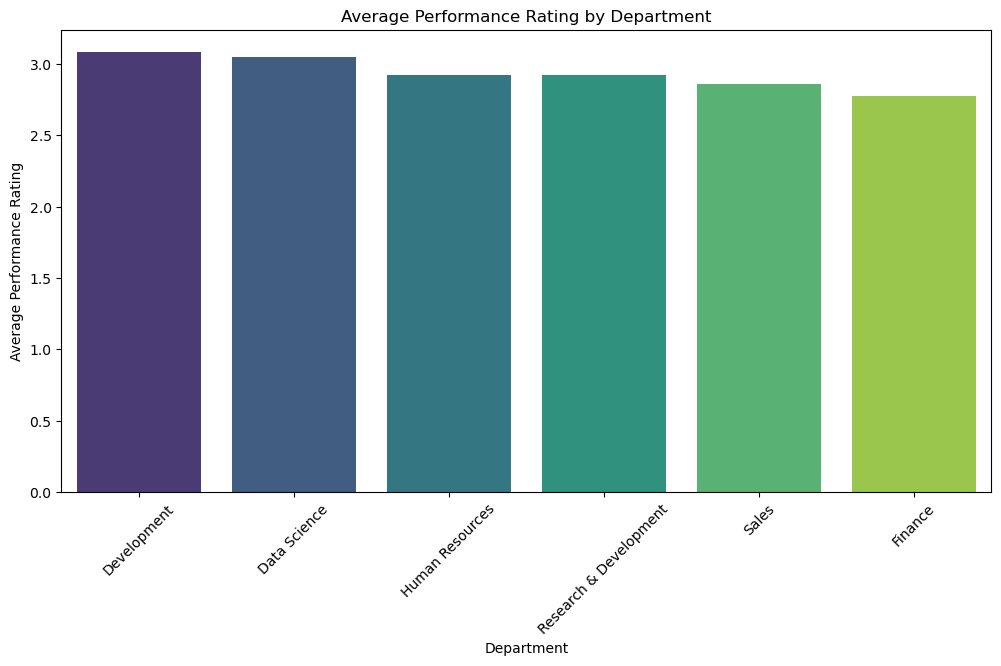

In [140]:
dept_performance = df.groupby('EmpDepartment')['PerformanceRating'].agg(['mean', 'median', 'count', 'std', 'min', 'max'])
dept_performance = dept_performance.sort_values(by='mean', ascending=False)
print(dept_performance)
plt.figure(figsize=(12, 6))
sns.barplot(x=dept_performance.index, y=dept_performance['mean'], palette='viridis')
plt.xticks(rotation=45)
plt.title('Average Performance Rating by Department')
plt.xlabel('Department')
plt.ylabel('Average Performance Rating')
plt.show()

<div style="background-color: #eef2f7; color: #333; padding: 25px; border-radius: 10px; font-size: 18px; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.15); border-left: 8px solid #0073e6; font-family: Arial, sans-serif;">
    <h1 style="color: #0056b3; text-align: center;">Department-Wise Performance Analysis</h1>    
    <h2 style="color: #004080;">Top Performing Departments</h2>
    <ul>
        <li><b>Development (3.09)</b> has the highest mean performance, with low variation (std = 0.39).</li>
        <li><b>Data Science (3.05)</b> is slightly behind but has a very small sample size (only 20 employees).</li>
    </ul>    
    <h2 style="color: #004080;">Lowest Performing Departments</h2>
    <ul>
        <li><b>Finance (2.78)</b> has the lowest mean rating, with a relatively high standard deviation (0.59), meaning performance varies significantly.</li>
        <li><b>Sales (2.86)</b> and <b>R&D (2.92)</b> also have lower ratings compared to Development.</li>
    </ul>    
    <h2 style="color: #004080;">Performance Consistency</h2>
    <ul>
        <li><b>Development</b> has a small standard deviation (0.39), meaning performance is more consistent.</li>
        <li><b>Human Resources (HR)</b> and <b>Finance</b> have higher standard deviations (~0.54–0.59), indicating a mix of high and low performers.</li>
    </ul>    
</div>

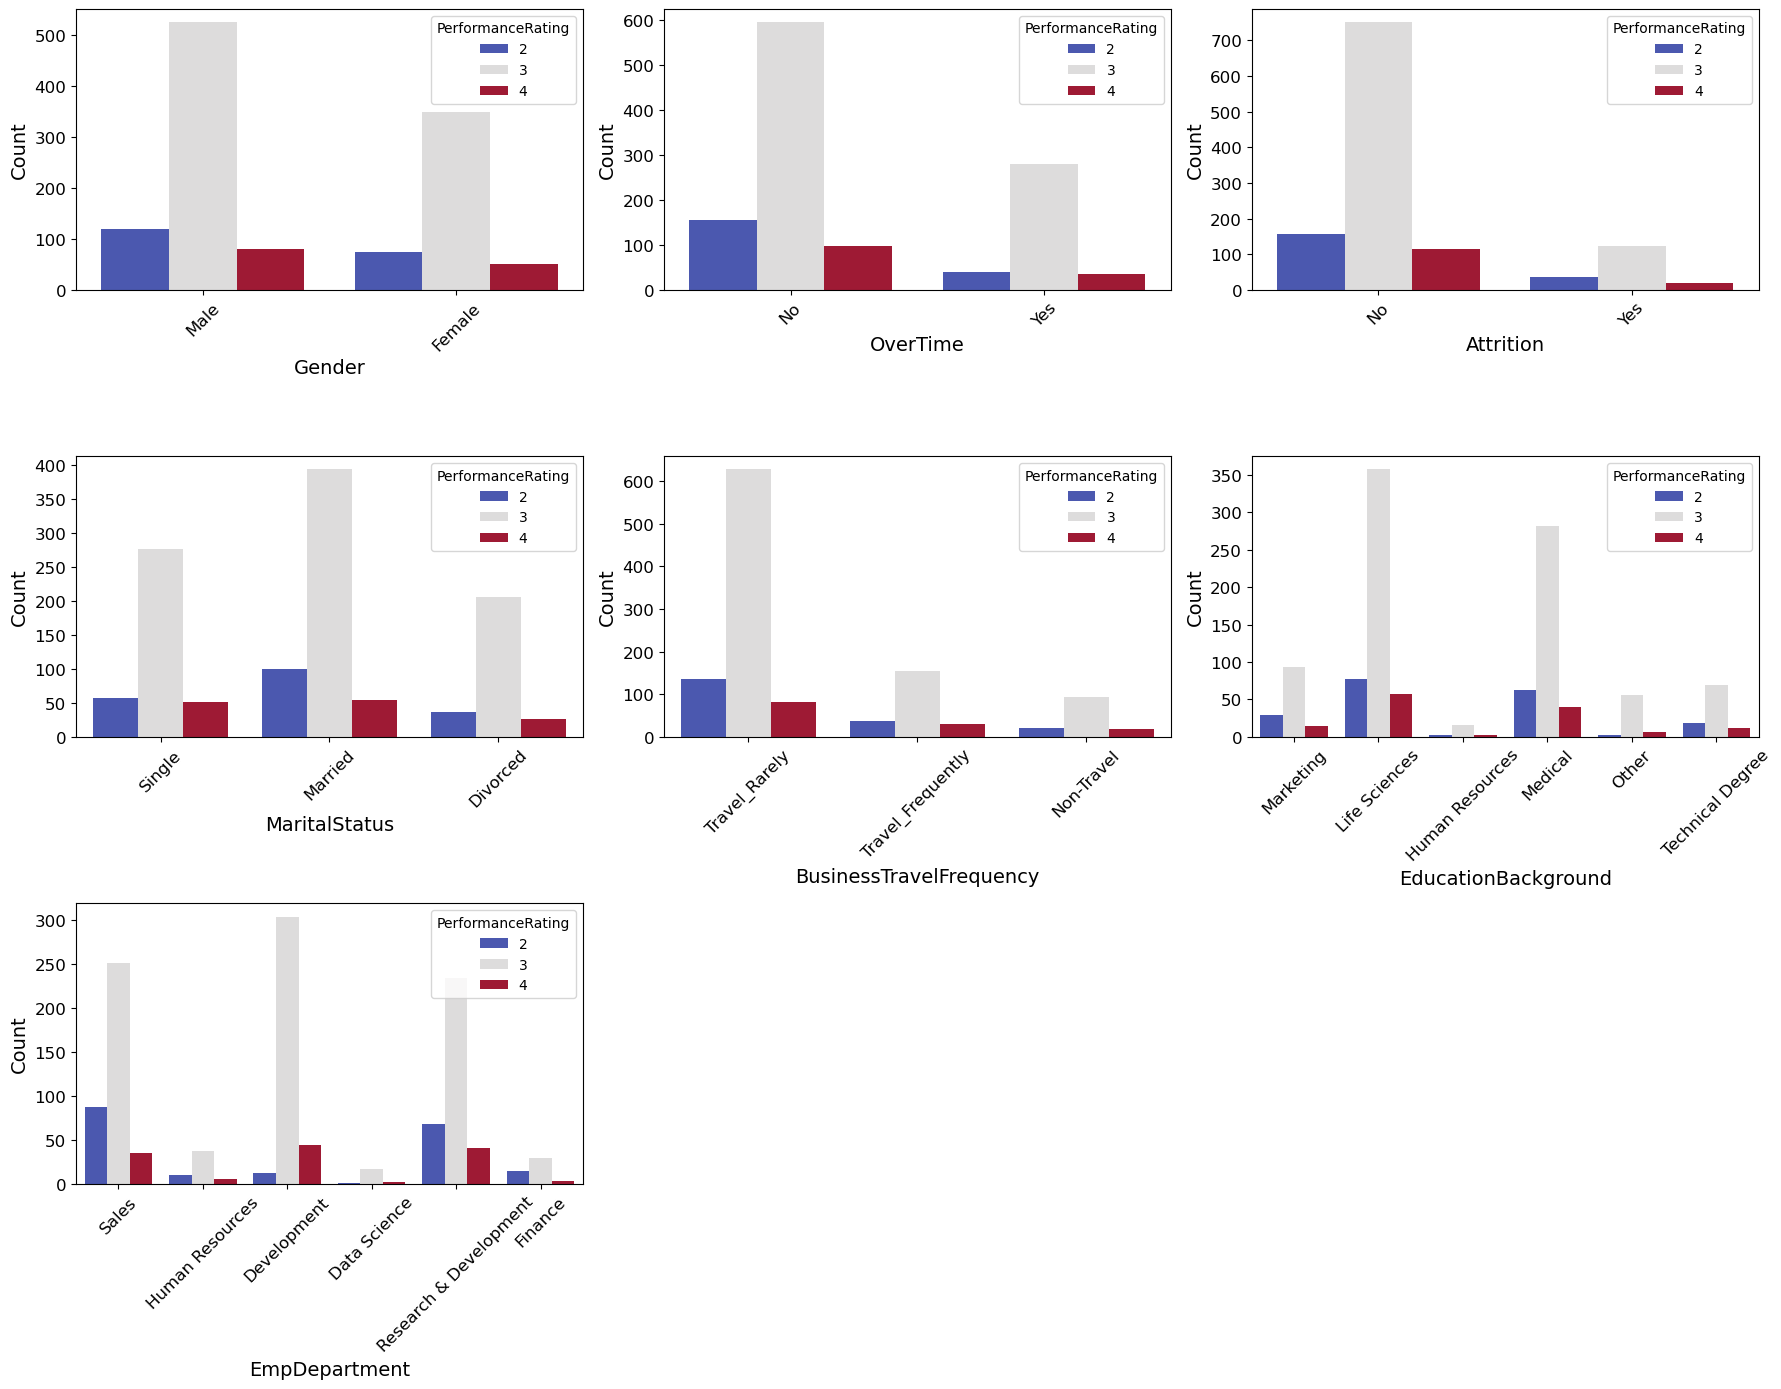

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols[categorical_cols != 'EmpJobRole']

categorical_cols = sorted(categorical_cols, key=lambda col: df[col].nunique())

plt.figure(figsize=(18, 14))
plot = 1

for col in categorical_cols:
    if plot <= 9:  
        ax = plt.subplot(3, 3, plot)
        
        sns.countplot(x=df[col], hue=df['PerformanceRating'], palette='coolwarm')
        plt.xlabel(col, fontsize=14)
        plt.ylabel("Count", fontsize=14)
        plt.xticks(rotation=45, fontsize=12)
        plt.yticks(fontsize=12)

        plot += 1

plt.tight_layout()
plt.show()


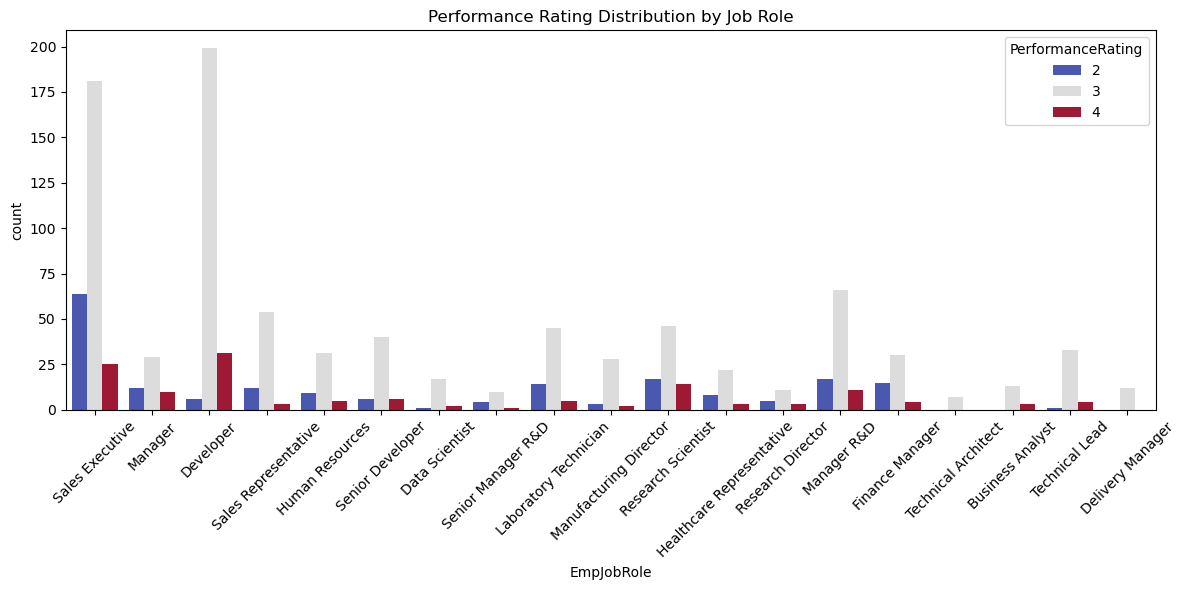

In [144]:

plt.figure(figsize=(12, 6))

sns.countplot(x=df["EmpJobRole"], hue=df['PerformanceRating'], palette='coolwarm')
plt.xlabel("EmpJobRole")
plt.xticks(rotation=45)
plt.title("Performance Rating Distribution by Job Role")

plt.tight_layout()
plt.show()

<div style="background-color: #eef2f7; color: #333; padding: 25px; border-radius: 10px; font-size: 18px; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.15); border-left: 8px solid #0073e6; font-family: Arial, sans-serif;">
    <h1 style="color: #0056b3; text-align: center;">Employee Performance Insights</h1>    
    <h2 style="color: #004080;">Gender & Performance</h2>
    <ul>
        <li><b>Males</b> have more high performers (81 rated 4), but <b>females</b> show more consistency with fewer low performers.</li>
    </ul>    
    <h2 style="color: #004080;">Overtime Impact</h2>
    <ul>
        <li>Employees <b>without overtime</b> perform better (97 rated 4 vs. 35 with overtime), suggesting overtime may lead to burnout.</li>
    </ul>    
    <h2 style="color: #004080;">Attrition & Performance</h2>
    <ul>
        <li><b>High performers</b> tend to stay, while <b>low performers</b> are more likely to leave.</li>
    </ul>    
    <h2 style="color: #004080;">Marital Status</h2>
    <ul>
        <li><b>Married employees</b> have the most high performers (55 rated 4), while <b>divorced employees</b> have the least (26).</li>
    </ul>    
    <h2 style="color: #004080;">Business Travel & Performance</h2>
    <ul>
        <li>Employees who travel <b>rarely</b> have the highest top performers (83 rated 4), while <b>frequent travelers</b> struggle.</li>
    </ul>    
    <h2 style="color: #004080;">Education Background</h2>
    <ul>
        <li><b>Life Sciences</b> employees have the most high performers (57 rated 4).</li>
        <li><b>HR & Other fields</b> have the fewest.</li>
    </ul>    
    <h2 style="color: #004080;">Department-Wise Performance</h2>
    <ul>
        <li><b>Finance</b> has the lowest high performers (4 rated 4).</li>
        <li><b>Sales</b> has the most low performers (87 rated 2).</li>
    </ul>    
    <h2 style="color: #004080;">Job Roles & Performance</h2>   
    <h3 style="color: #003366;">Top Performers (Rating 4)</h3>
    <ul>
        <li><b>Developer</b> (31)</li>
        <li><b>Sales Executive</b> (25)</li>
        <li><b>Manager R&D</b> (11)</li>
    </ul>    
    <h3 style="color: #003366;">Low Performers (Rating 2)</h3>
    <ul>
        <li><b>Sales Executive</b> (64)</li>
        <li><b>Research Scientist</b> (17)</li>
    </ul>    
    <h3 style="color: #003366;">Consistent Performers (Rating 3 Dominance)</h3>
    <ul>
        <li><b>Developer</b> (199)</li>
        <li><b>Sales Executive</b> (181)</li>
        <li><b>Manager R&D</b> (66)</li>
    </ul>    

</div>


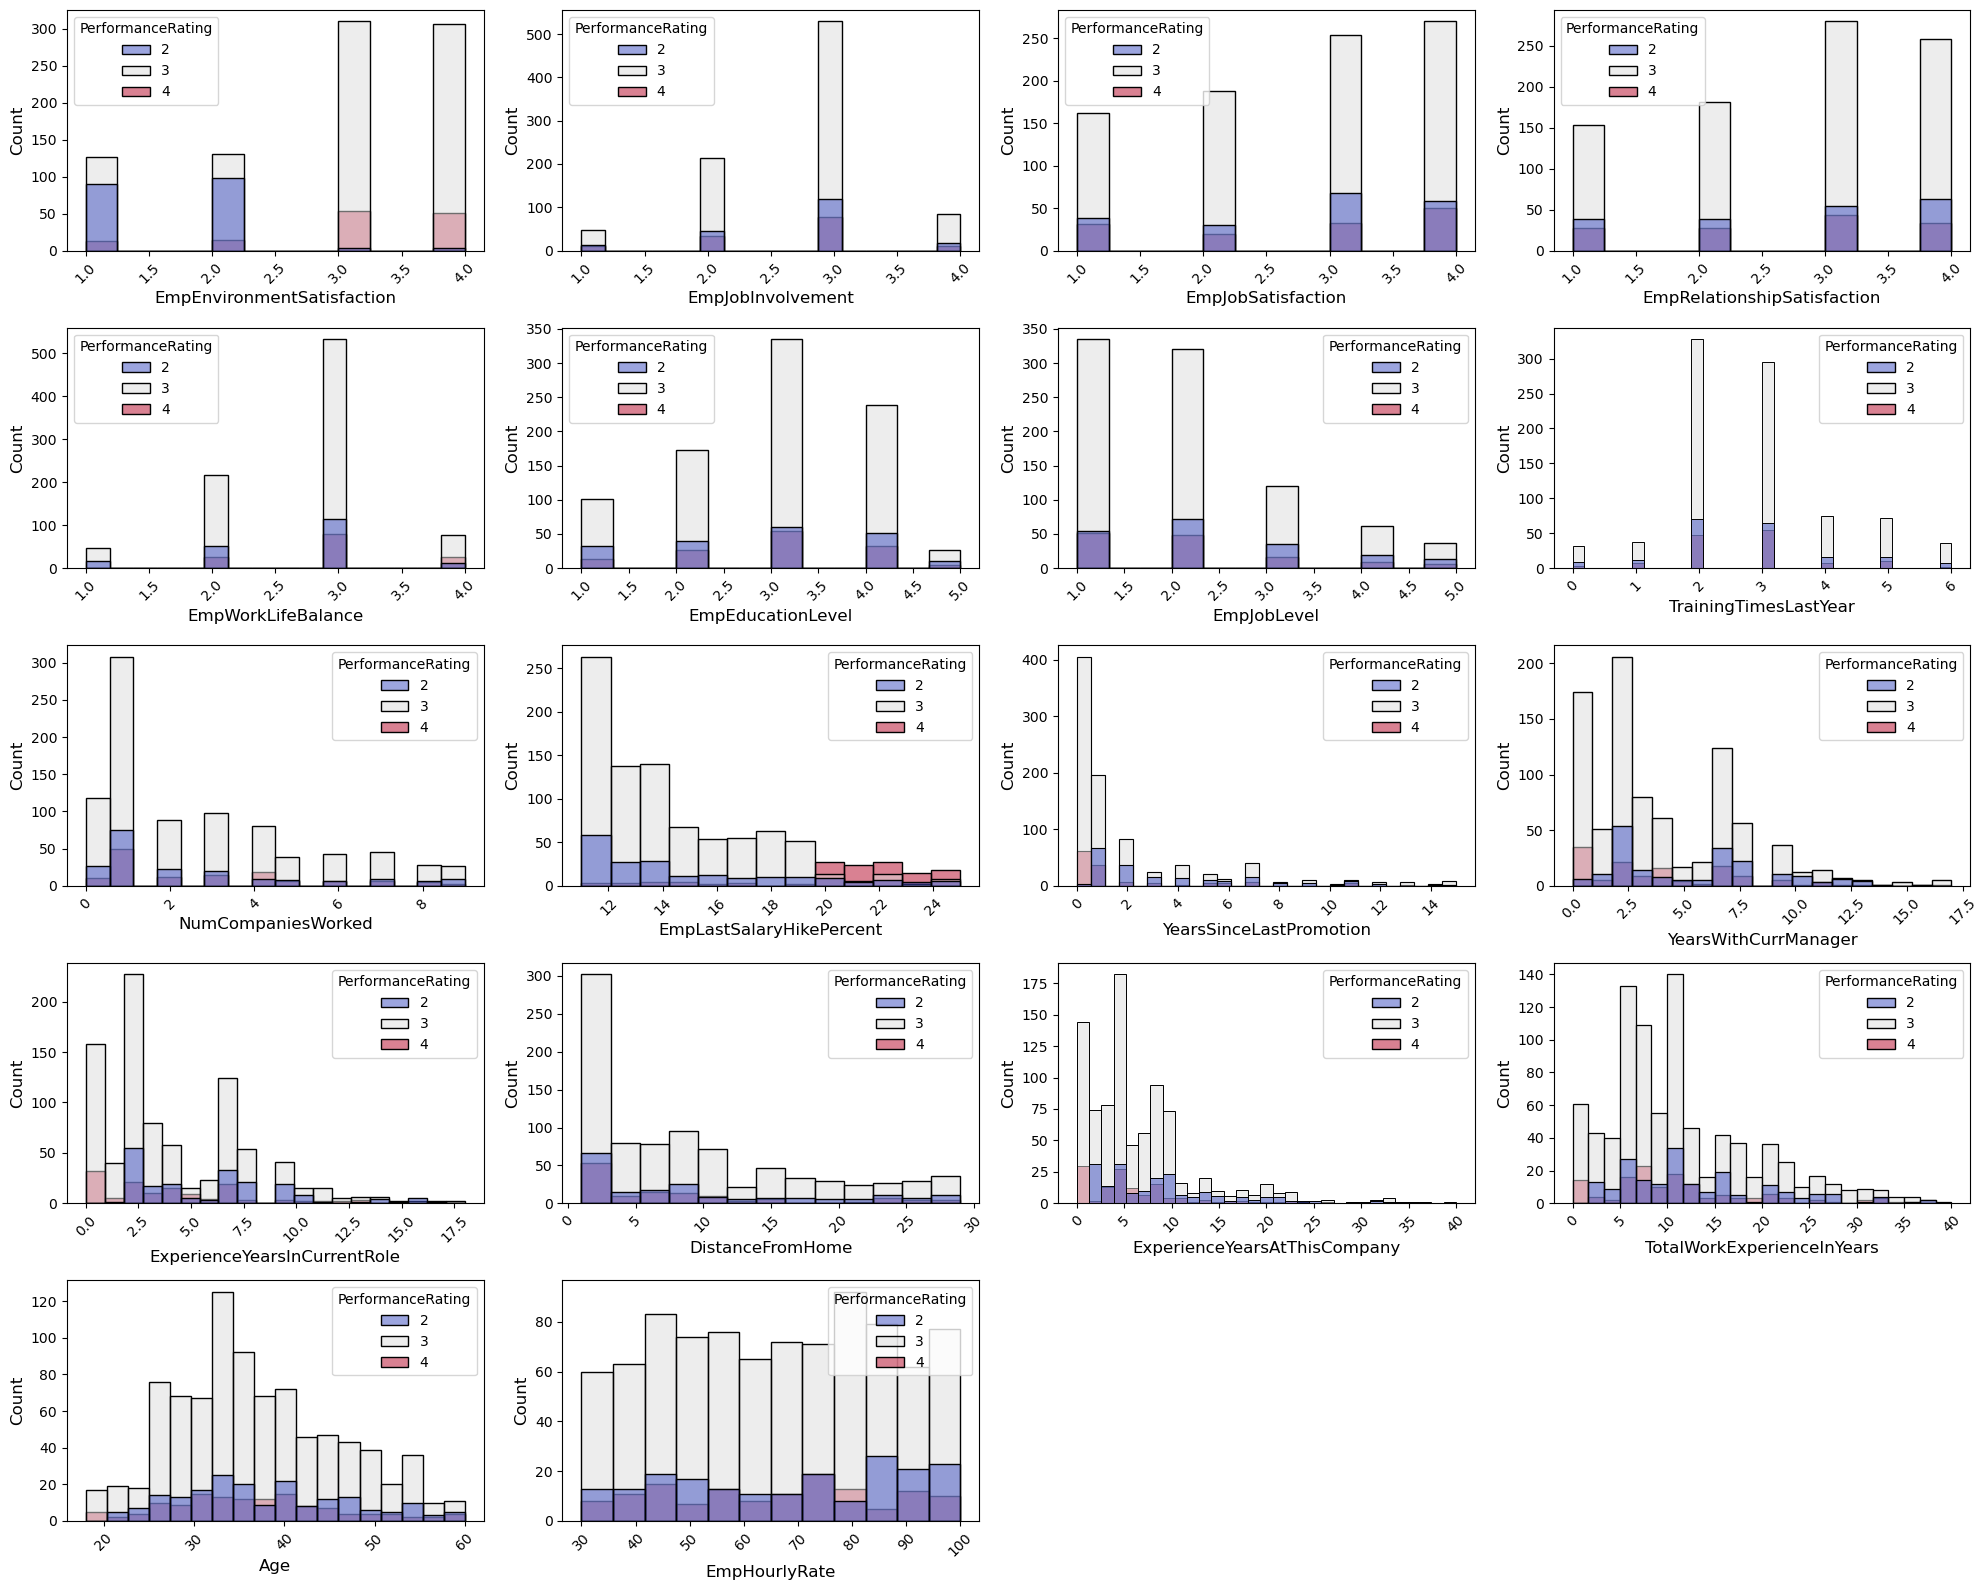

In [146]:
num_cols = df.select_dtypes(include=['int64']).columns
num_cols = [col for col in num_cols if col != 'PerformanceRating']  
num_cols = sorted(num_cols, key=lambda col: df[col].nunique())

plt.figure(figsize=(20, 16))  
plot = 1

for col in num_cols:
    if plot <= 19:  
        ax = plt.subplot(5, 4, plot)  
        
        sns.histplot(x=df[col], hue=df['PerformanceRating'], palette='coolwarm')
        plt.xlabel(col, fontsize=12)  
        plt.ylabel("Count", fontsize=12)
        plt.xticks(rotation=45, fontsize=10)
        plt.yticks(fontsize=10)

        plot += 1

plt.tight_layout()
plt.show()

<div style="background-color: #eef2f7; color: #333; padding: 25px; border-radius: 10px; font-size: 18px; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.15); border-left: 8px solid #0073e6; font-family: Arial, sans-serif;"> 
    <h2 style="color: #004080;">Satisfaction & Job Involvement</h2>
    <ul>
        <li><b>EmpEnvironmentSatisfaction:</b> Highest satisfaction levels are at 3 and 4.</li>
        <li><b>EmpJobInvolvement:</b> Most employees are involved at level 3.</li>
        <li><b>EmpJobSatisfaction:</b> Employees with level 4 job satisfaction tend to have higher performance ratings.</li>
        <li><b>EmpRelationshipSatisfaction:</b> Employees at level 3 show the highest performance.</li>
        <li><b>EmpWorkLifeBalance:</b> Employees with level 3 work-life balance tend to perform better.</li>
    </ul>    
    <h2 style="color: #004080;">Education & Career Levels</h2>
    <ul>
        <li><b>EmpEducationLevel:</b> Employees with an education level of 3 demonstrate the highest performance.</li>
        <li><b>EmpJobLevel:</b> Employees at job level 1 have the highest performance.</li>
        <li><b>TrainingTimesLastYear:</b> Employees who received training twice last year tend to have higher performance.</li>
    </ul>    
    <h2 style="color: #004080;">Right-Skewed Features</h2>
    <p>These features exhibit right-skewed distributions:</p>
    <ul>
        <li><b>NumCompaniesWorked</b></li>
        <li><b>EmpLastSalaryHikePercent</b></li>
        <li><b>YearsSinceLastPromotion</b></li>
        <li><b>YearsWithCurrManager</b></li>
        <li><b>ExperienceYearsInCurrentRole</b></li>
        <li><b>DistanceFromHome</b></li>
        <li><b>ExperienceYearsAtThisCompany</b></li>
        <li><b>TotalWorkExperienceInYears</b></li>
        <li><b>Age</b></li>
    </ul>    
    <h2 style="color: #004080;">Feature-Specific Insights</h2>
    <ul>
        <li><b>NumCompaniesWorked:</b> Most employees have worked at only one company before joining INX Future Inc.</li>
        <li><b>EmpLastSalaryHikePercent:</b> Majority received a 12% salary hike in their last increment.</li>
        <li><b>YearsSinceLastPromotion:</b> A significant number have not received a promotion in the last year.</li>
        <li><b>YearsWithCurrManager:</b> Most employees have worked with their current manager for about 2 years.</li>
        <li><b>ExperienceYearsInCurrentRole:</b> The majority have 2 years of experience in their current role.</li>
        <li><b>DistanceFromHome:</b> Most employees live close to the company.</li>
        <li><b>ExperienceYearsAtThisCompany:</b> Employees typically have 5 years of experience at INX Future Inc.</li>
        <li><b>TotalWorkExperienceInYears:</b> Most employees have either 5 or 10 years of total work experience.</li>
        <li><b>Age:</b> The majority of employees are between 32 and 36 years old.</li>
    </ul>    
    <h2 style="color: #004080;">EmpHourlyRate & Performance Trends</h2>
    <ul>
        <li><b>EmpHourlyRate:</b> Appears to follow a uniform distribution, with most employees receiving a performance rating of 3.</li>
        <li><b>Overall Performance Trend:</b> Performance rating 3 is the most frequent across all features.</li>
    </ul>    

</div>


<div style="background-color: #eef2f7; color: #333; padding: 25px; border-radius: 10px; font-size: 18px; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.15); border-left: 8px solid #0073e6; font-family: Arial, sans-serif;">    
    <h2 style="color: #004080;">Top 3 Factors Affecting Employee Performance</h2>
    <ol>
        <li><b>Job Satisfaction (EmpJobSatisfaction)</b><br>
            Employees with higher job satisfaction (Level 4) tend to have higher performance ratings. Job satisfaction directly influences motivation, engagement, and overall productivity.
        </li>
        <li><b>Work-Life Balance (EmpWorkLifeBalance)</b><br>
            Employees with a work-life balance rating of Level 3 tend to perform better. Employees experiencing burnout from excessive work (Overtime factor) tend to have lower performance. This suggests that maintaining a healthy work-life balance is crucial for sustained high performance.
        </li>
        <li><b>Job Involvement (EmpJobInvolvement)</b><br>
            Employees with higher job involvement (Level 3) tend to be more engaged and dedicated. Engagement leads to better productivity, commitment, and overall performance.
        </li>
    </ol>
    <h2 style="color: #004080;">Additional Influencing Factors</h2>
    <ul>
        <li><b>Salary Hike Percentage:</b> Employees receiving competitive salary hikes tend to perform better.</li>
        <li><b>Business Travel Frequency:</b> Employees who travel frequently struggle with performance, possibly due to fatigue.</li>
        <li><b>Overtime:</b> Employees working overtime show lower performance, likely due to stress and burnout.</li>
    </ul>
    <h2 style="color: #004080;">Key Insights & Recommendations</h2>
    <p>Employee performance at INX Future Inc. is strongly influenced by Job Satisfaction, Work-Life Balance, and Job Involvement. Additionally, fair compensation, controlled business travel, and avoiding excessive overtime play significant roles in enhancing performance. To improve productivity and retention:</p>
    <ul>
        <li>Foster a positive work environment with initiatives to boost job satisfaction.</li>
        <li>Encourage a balanced workload to prevent burnout and sustain high performance.</li>
        <li>Ensure fair salary increments to keep employees motivated and engaged.</li>
    </ul>

</div>


<div style="background-color: #e3f2fd; color: #0d47a1; padding: 15px; border-radius: 8px; font-size: 36px; font-weight: bold; text-align: center; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);">
   Handling Outliers
</div>

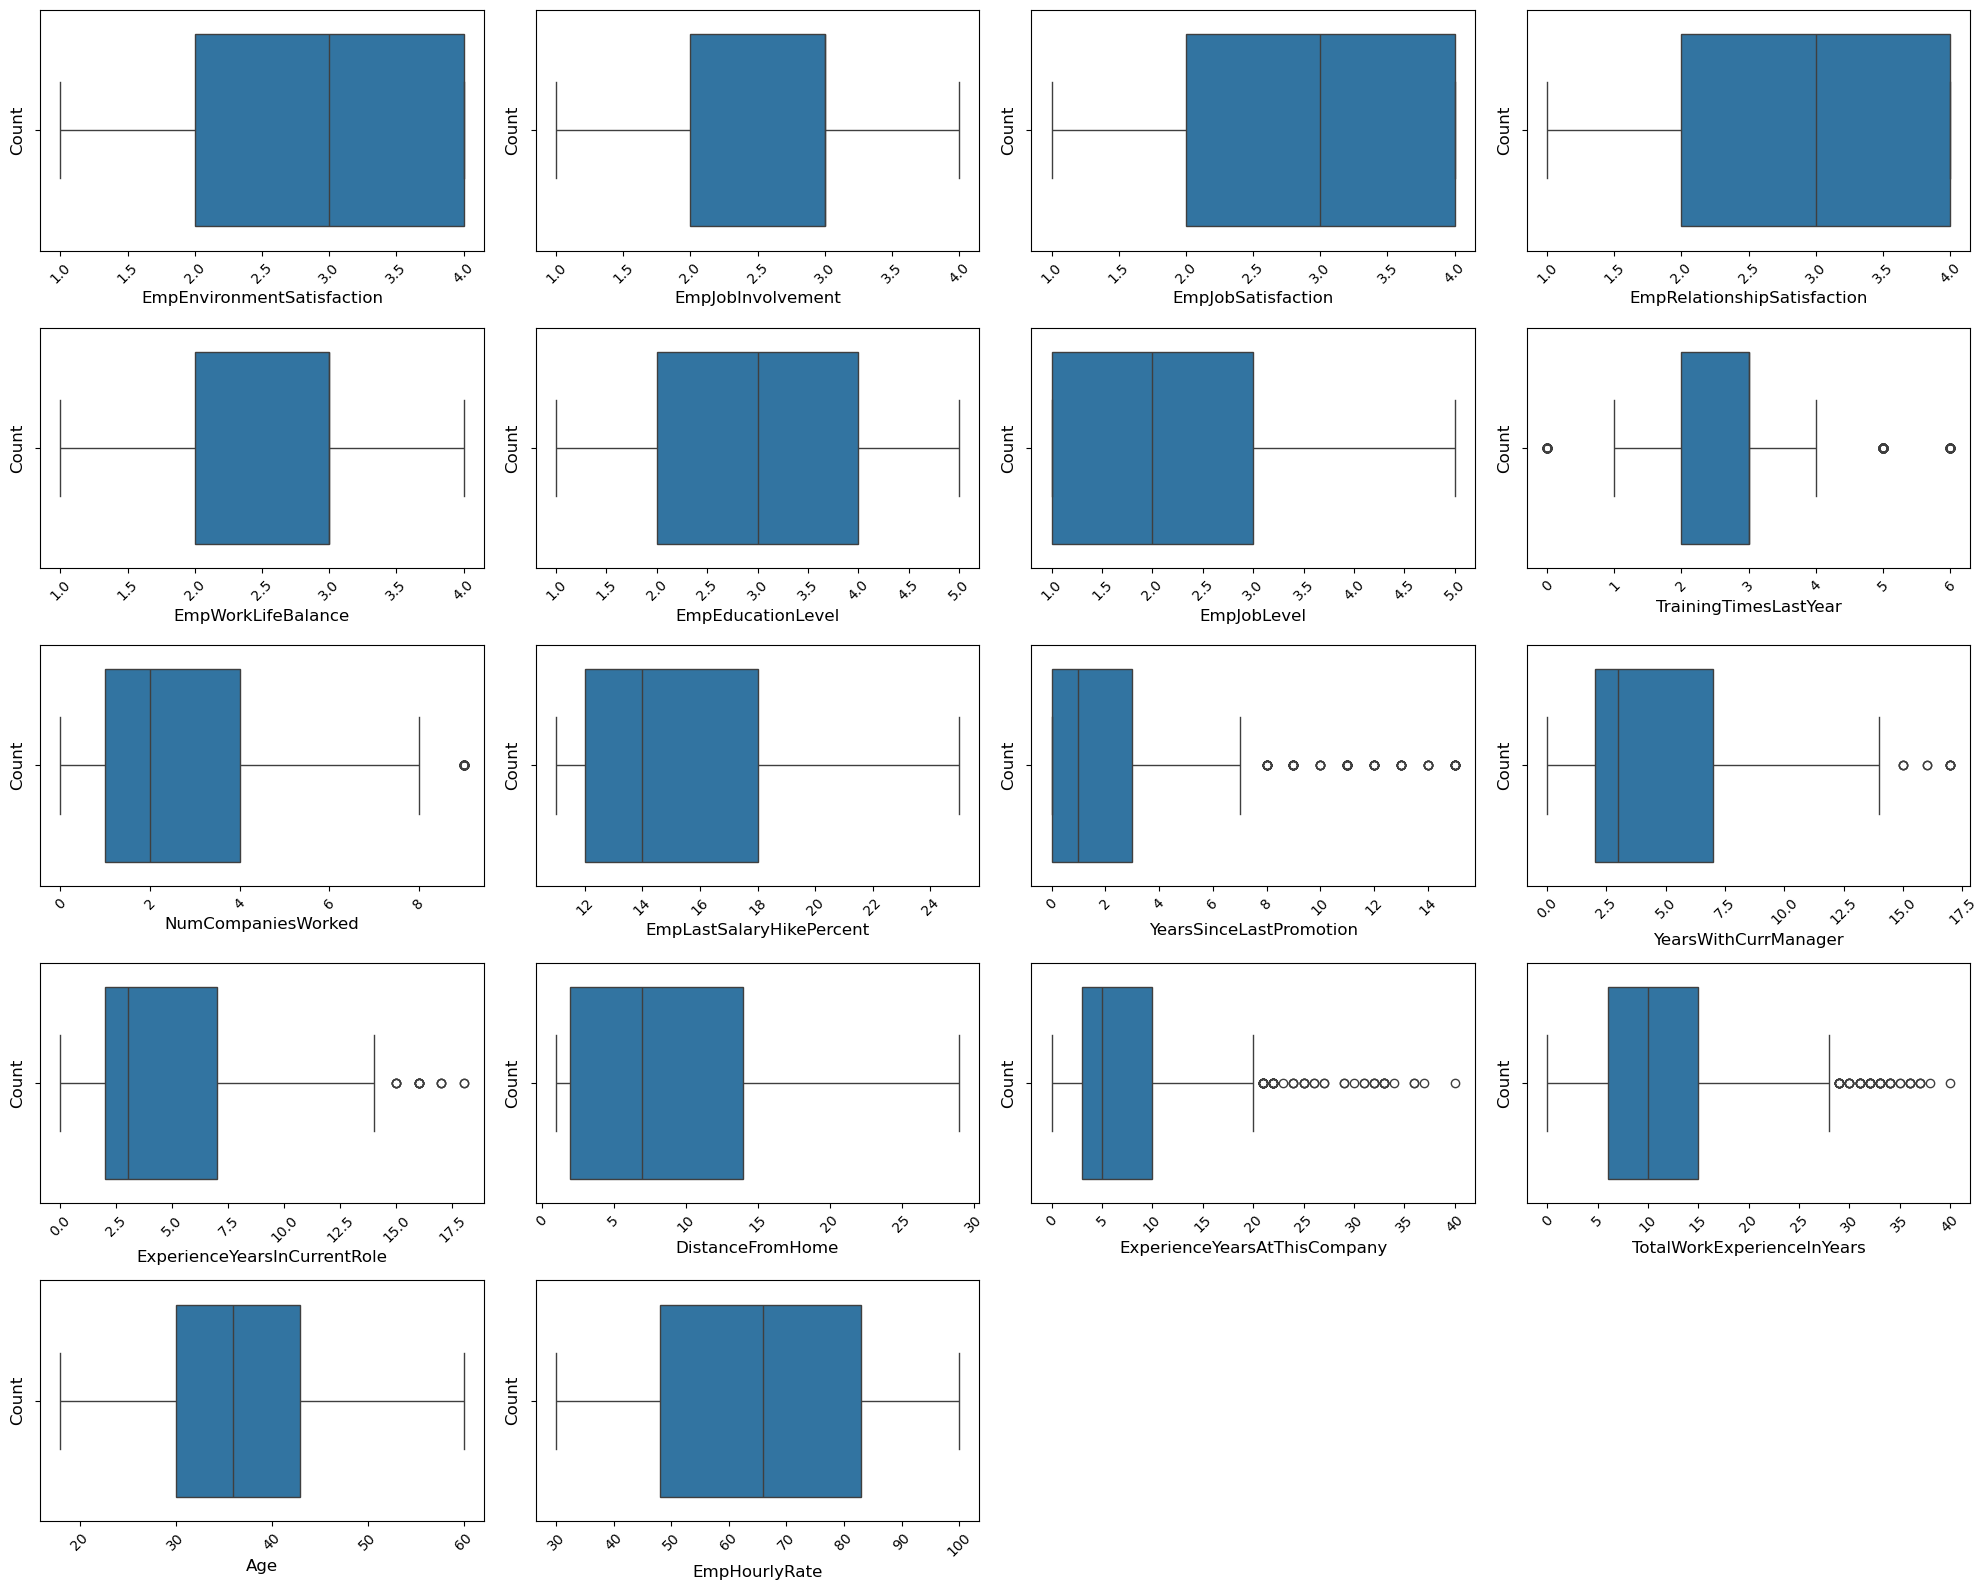

In [150]:
num_cols = df.select_dtypes(include=['int64']).columns
num_cols = [col for col in num_cols if col != 'PerformanceRating']  
num_cols = sorted(num_cols, key=lambda col: df[col].nunique())

plt.figure(figsize=(20, 16))  
plot = 1

for col in num_cols:
    if plot <= 19:  
        ax = plt.subplot(5, 4, plot)  
        
        sns.boxplot(x=df[col])
        plt.xlabel(col, fontsize=12)  
        plt.ylabel("Count", fontsize=12)
        plt.xticks(rotation=45, fontsize=10)
        plt.yticks(fontsize=10)

        plot += 1

plt.tight_layout()
plt.show()

<div style="background-color: #f0f8ff; color: #005f73; padding: 10px; border-radius: 5px;font-size: 40px;">
   Selected only the features that contain outliers.
</di>

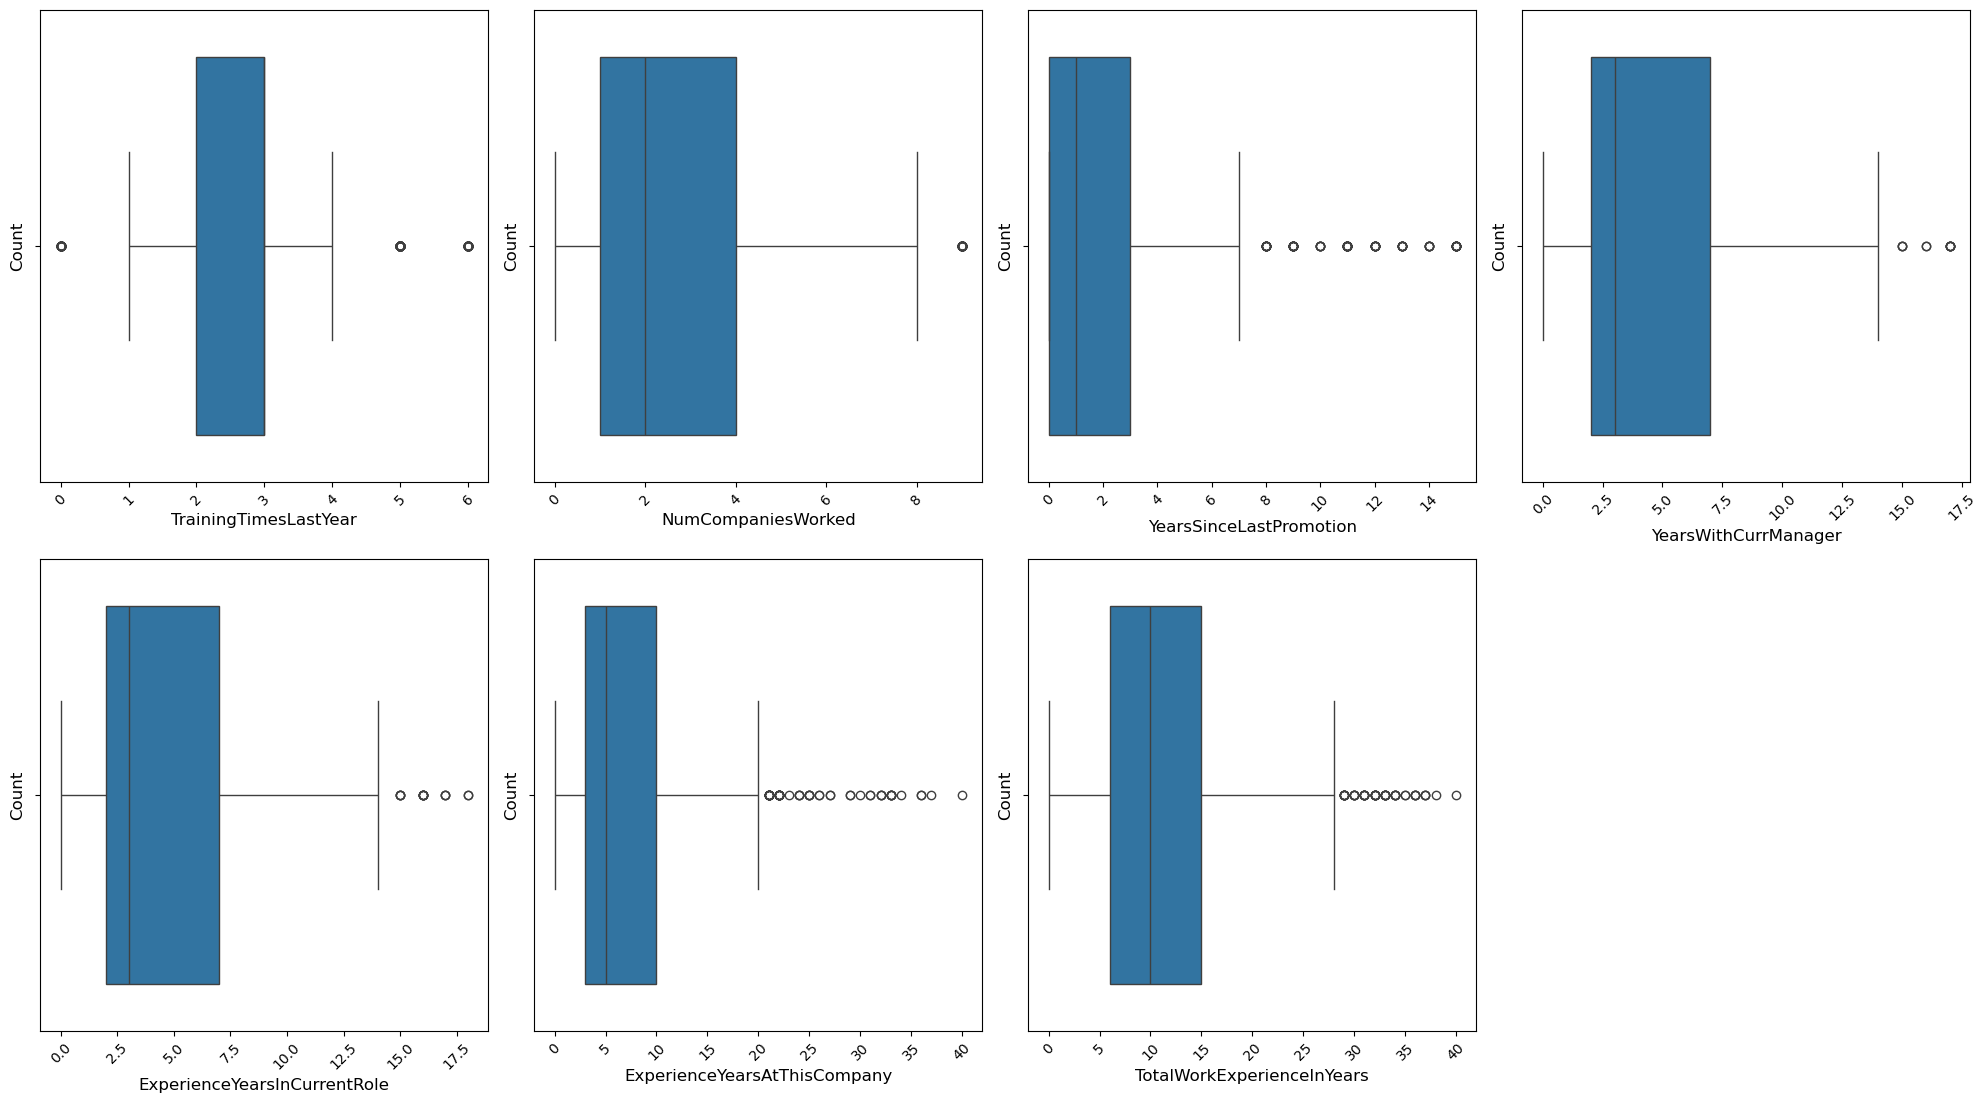

In [154]:
num_cols = ['TrainingTimesLastYear','NumCompaniesWorked', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'ExperienceYearsInCurrentRole','ExperienceYearsAtThisCompany', 'TotalWorkExperienceInYears']

plt.figure(figsize=(20, 16))  
plot = 1

for col in num_cols:
    if plot <= 8:  
        ax = plt.subplot(3, 4, plot)  
        
        sns.boxplot(x=df[col])
        plt.xlabel(col, fontsize=12)  
        plt.ylabel("Count", fontsize=12)
        plt.xticks(rotation=45, fontsize=10)
        plt.yticks(fontsize=10)

        plot += 1

plt.tight_layout()
plt.show()

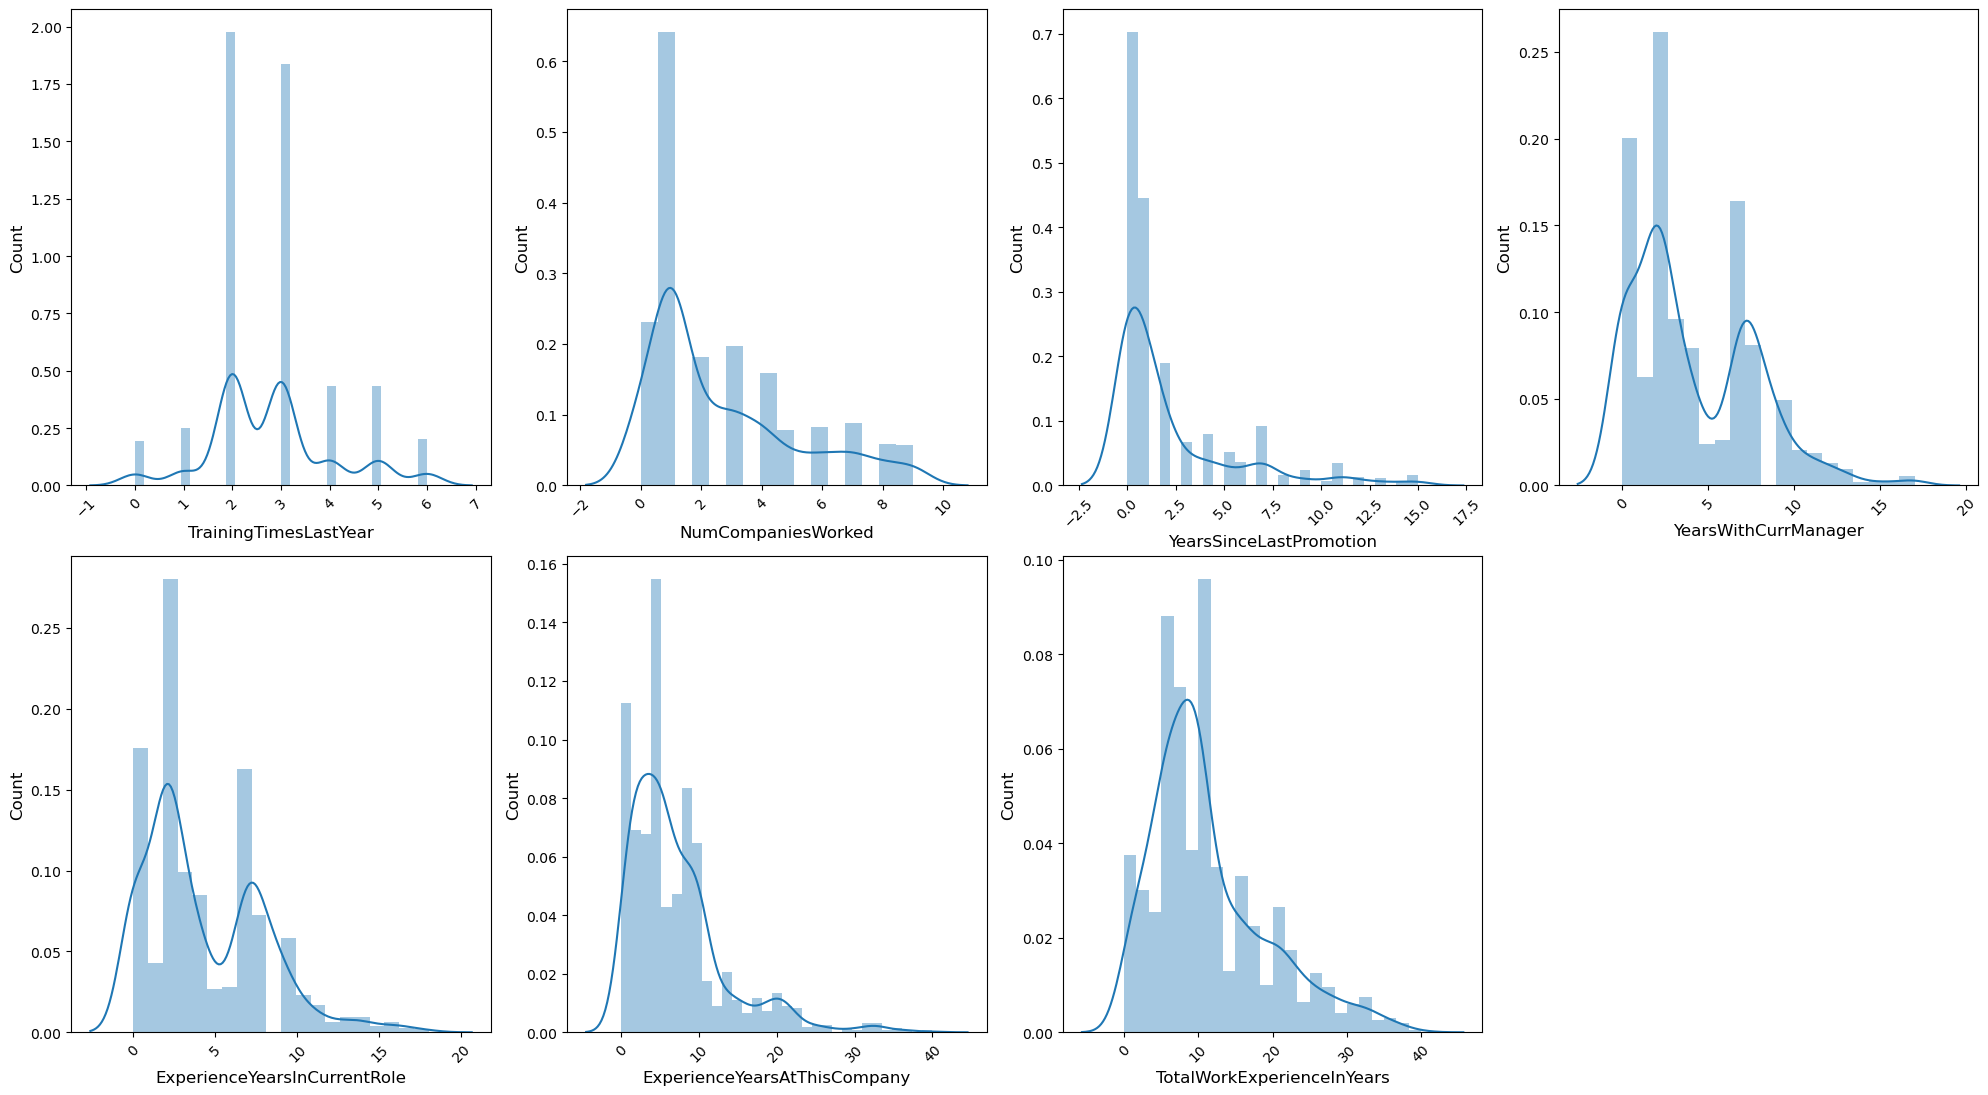

In [155]:
num_cols = ['TrainingTimesLastYear','NumCompaniesWorked', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'ExperienceYearsInCurrentRole','ExperienceYearsAtThisCompany', 'TotalWorkExperienceInYears']

plt.figure(figsize=(20, 16))  
plot = 1

for col in num_cols:
    if plot <= 8:  
        ax = plt.subplot(3, 4, plot)  
        
        sns.distplot(x=df[col])
        plt.xlabel(col, fontsize=12)  
        plt.ylabel("Count", fontsize=12)
        plt.xticks(rotation=45, fontsize=10)
        plt.yticks(fontsize=10)

        plot += 1

plt.tight_layout()
plt.show()

<div style="background-color: #eef2f7; color: #333; padding: 25px; border-radius: 10px; font-size: 22px; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.15); border-left: 8px solid #0073e6; font-family: Arial, sans-serif;">    
    <p style="font-size: 24px;">Most of the features exhibit right-skewed distributions, which may impact model performance and require transformation. Additionally, every feature contains a countable number of outliers (ranging from 1 to 14). Therefore, we apply log transformation in this case, making log transformation a suitable choice.</p>
</div>


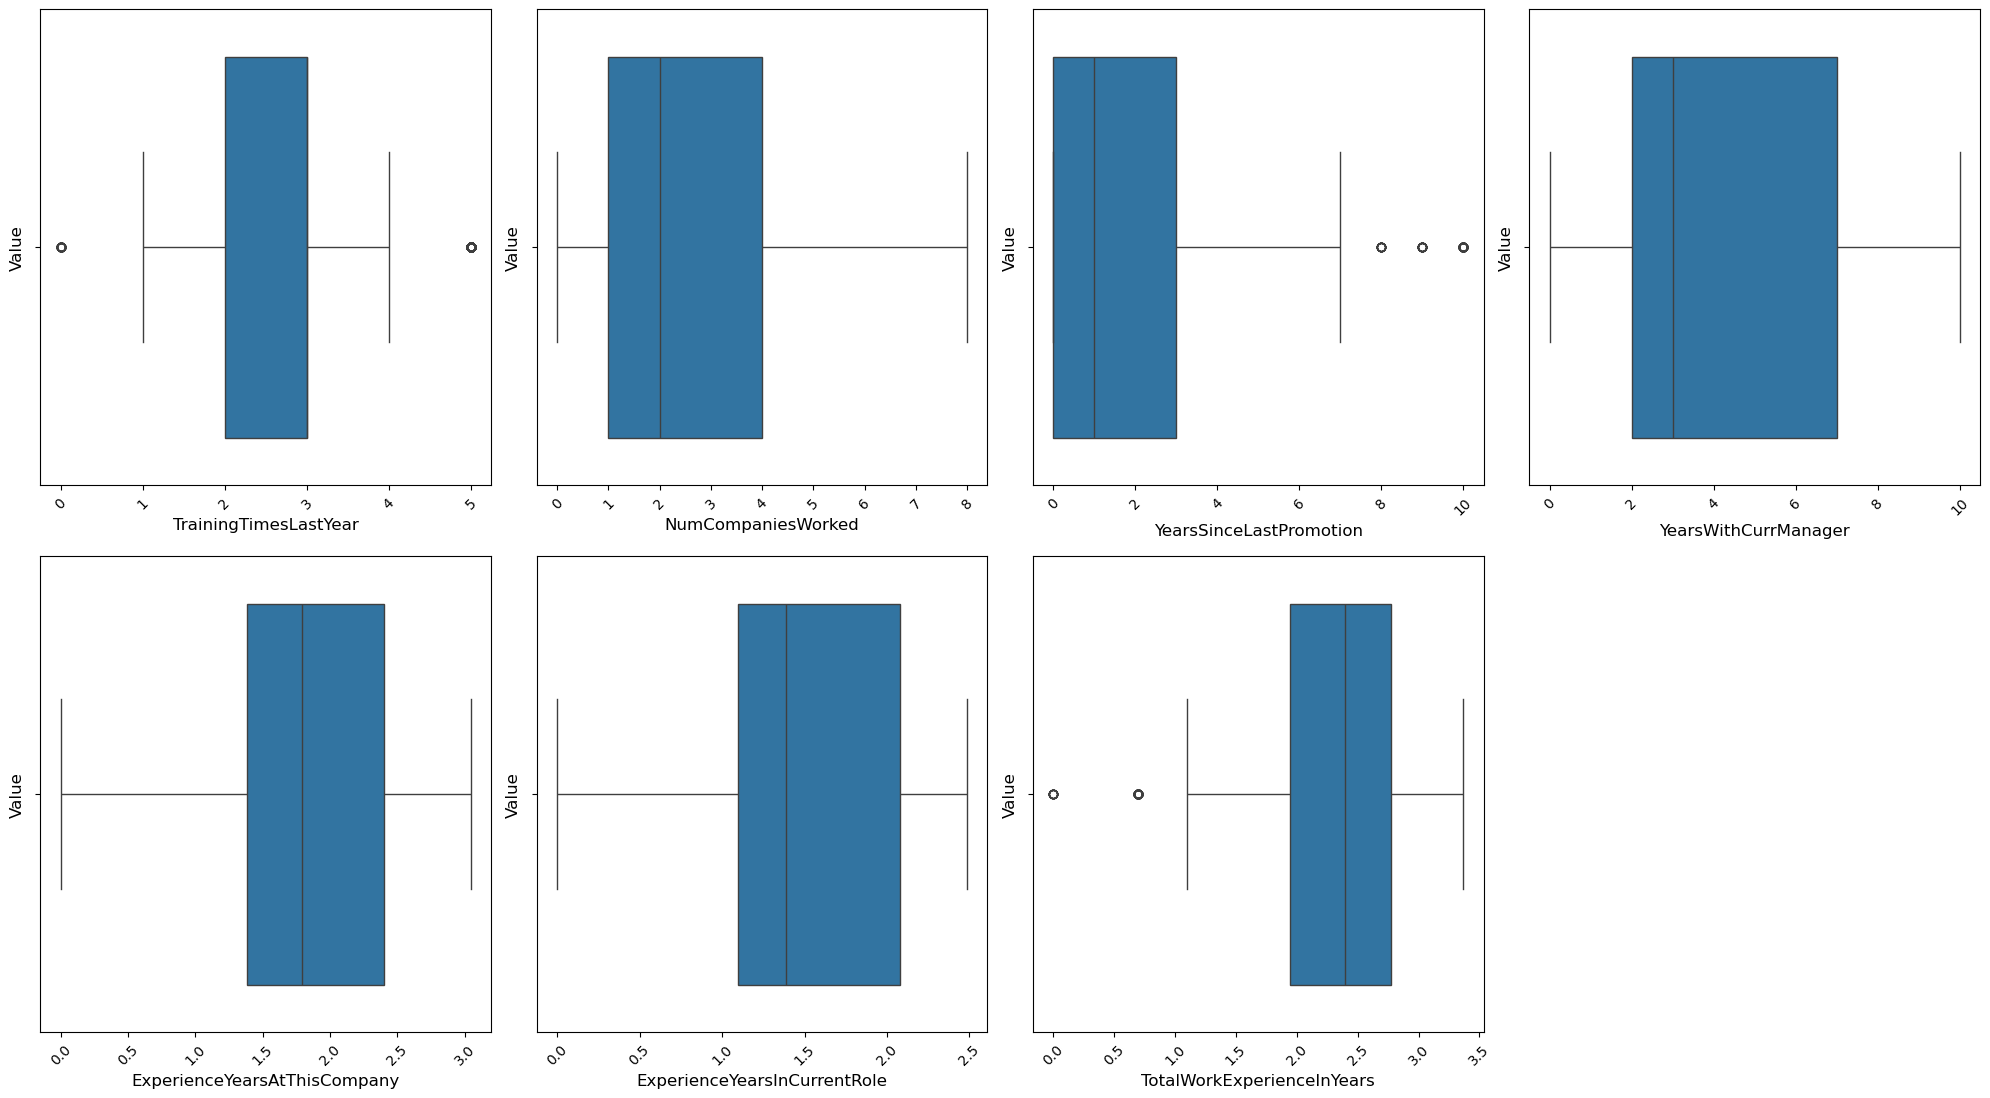

In [157]:
no_transform_cols = ['TrainingTimesLastYear', 'NumCompaniesWorked', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
log_transform_cols = ['ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole', 'TotalWorkExperienceInYears']

df[log_transform_cols] = np.log1p(df[log_transform_cols])

for col in no_transform_cols + log_transform_cols:
    df[col] = winsorize(df[col], limits=[0, 0.05])  

plt.figure(figsize=(20, 16))
plot = 1

for col in no_transform_cols + log_transform_cols:
    if plot <= 8:
        ax = plt.subplot(3, 4, plot)
        sns.boxplot(x=df[col])
        plt.xlabel(col, fontsize=12)
        plt.ylabel("Value", fontsize=12)
        plt.xticks(rotation=45, fontsize=10)
        plt.yticks(fontsize=10)
        plot += 1

plt.tight_layout()
plt.show()


<div style="background-color: #eef2f7; color: #333; padding: 25px; border-radius: 10px; font-size: 22px; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.15); border-left: 8px solid #0073e6; font-family: Arial, sans-serif;">    
    <ul style="font-size: 24px; line-height: 1.6;">
        <li>Preserves Data – Instead of removing outliers, Winsorization caps extreme values, and log transformation scales right-skewed data while keeping all values.</li>
        <li>Handles Skewness – Log transformation stabilizes variance and makes patterns more interpretable, improving model performance.</li>
        <li>Prevents Distortion – Winsorization prevents outliers from misleading models while retaining their contribution.</li>
        <li>Retains Meaningful Features – Features with few unique values are kept as categorical or ordinal, avoiding unnecessary transformations.</li>
        <li>Enhances Model Accuracy – Right-skewed data can impact models like Linear Regression, SVM, and Clustering; this method improves interpretation without losing key patterns.</li>
    </ul>
</div>

<div style="background-color: #e3f2fd; color: #0d47a1; padding: 15px; border-radius: 8px; font-size: 36px; font-weight: bold; text-align: center; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);">
   Encoding
</div>

<div style="background-color: #eef2f7; color: #333; padding: 25px; border-radius: 10px; font-size: 22px; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.15); border-left: 8px solid #0073e6; font-family: Arial, sans-serif;">
    <ul style="list-style-type: disc; margin-left: 25px; line-height: 1.7;">
        <li>In multiclass classification, it's recommended to start target labels from <strong>0</strong> (e.g., <strong>[0, 1, 2]</strong>) for better model performance and compatibility.</li>
        <li>If the labels are initially <strong>[2, 3, 4]</strong>, converting them to <strong>[0, 1, 2]</strong> ensures consistency across various machine learning models.</li>
        <li>Most models, including <strong>Logistic Regression, Decision Trees, SVM, and Neural Networks</strong>, perform optimally when labels start from 0.</li>
    </ul>
</div>


In [161]:
df['PerformanceRating'] = df['PerformanceRating'].replace({2: 0, 3: 1, 4: 2})

<div style="background-color: #eef2f7; color: #333; padding: 25px; border-radius: 10px; font-size: 22px; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.15); border-left: 8px solid #0073e6; font-family: Arial, sans-serif;">
    <p>Just because a feature is stored as an integer doesn’t mean it's continuous! We focus on how the data should be interpreted rather than its storage type.</p>
    <ul style="list-style-type: disc; margin-left: 25px; line-height: 1.7;">
        <li><strong>Not All int64 Features Are Truly Numerical</strong></li>
        <ul>
            <li><strong>Ordinal Example:</strong> EmpEducationLevel = 5 (PhD) is higher than EmpEducationLevel = 1 (High School), but the difference is not the same as in age or salary.</li>
            <li><strong>Nominal Example:</strong> EmpDepartment = 5 (IT) vs. EmpDepartment = 1 (HR) → The number has no numerical meaning, it's just a category.</li>
            <li><strong>Discrete Example:</strong> NumCompaniesWorked = 10 → You can’t have half a company worked at, so it's not continuous.</li>
        </ul>
    </ul>
    <p><strong>Feature Encoding & Scaling Techniques:</strong></p>
    <ul style="list-style-type: decimal; margin-left: 25px; line-height: 1.7;">
        <li><strong>Label Encoding (Nominal Features)</strong> - Converts categorical data without order into numerical values.</li>
        <li><strong>Ordinal Encoding (Ordinal Features)</strong> - Preserves meaningful order in ranked categories.</li>
        <li><strong>StandardScaler (Continuous Features)</strong> - Standardizes data (mean = 0, std = 1) for scale-sensitive models.</li>
        <li><strong>MinMaxScaler (Discrete Features)</strong> - Scales small-range features between 0-1 to maintain relative differences.</li>
    </ul>
</div>

In [164]:
df_processed = df.copy()

nominal_features = ['Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 
                    'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', 'Attrition']
label_encoder = LabelEncoder()
for col in nominal_features:
    df_processed[col] = label_encoder.fit_transform(df_processed[col])


ordinal_features = ['EmpEducationLevel', 'EmpEnvironmentSatisfaction', 'EmpJobInvolvement',
                    'EmpJobLevel', 'EmpJobSatisfaction', 'EmpRelationshipSatisfaction',
                    'EmpWorkLifeBalance']
ordinal_categories = [
    [1, 2, 3, 4, 5],  
    [1, 2, 3, 4],  
    [1, 2, 3, 4],  
    [1, 2, 3, 4, 5],  
    [1, 2, 3, 4],  
    [1, 2, 3, 4],  
    [1, 2, 3, 4]   
]
ordinal_encoder = OrdinalEncoder(categories=ordinal_categories)
df_processed[ordinal_features] = ordinal_encoder.fit_transform(df_processed[ordinal_features])


continuous_features = ['Age', 'DistanceFromHome', 'EmpHourlyRate', 'EmpLastSalaryHikePercent', 
                       'TotalWorkExperienceInYears', 'ExperienceYearsAtThisCompany', 
                       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
scaler = StandardScaler()
df_processed[continuous_features] = scaler.fit_transform(df_processed[continuous_features])


discrete_features = ['TrainingTimesLastYear', 'NumCompaniesWorked']
min_max_scaler = MinMaxScaler()
df_processed[discrete_features] = min_max_scaler.fit_transform(df_processed[discrete_features])

In [165]:
df=df_processed

In [166]:
df.dtypes

Age                             float64
Gender                            int32
EducationBackground               int32
MaritalStatus                     int32
EmpDepartment                     int32
EmpJobRole                        int32
BusinessTravelFrequency           int32
DistanceFromHome                float64
EmpEducationLevel               float64
EmpEnvironmentSatisfaction      float64
EmpHourlyRate                   float64
EmpJobInvolvement               float64
EmpJobLevel                     float64
EmpJobSatisfaction              float64
NumCompaniesWorked              float64
OverTime                          int32
EmpLastSalaryHikePercent        float64
EmpRelationshipSatisfaction     float64
TotalWorkExperienceInYears      float64
TrainingTimesLastYear           float64
EmpWorkLifeBalance              float64
ExperienceYearsAtThisCompany    float64
ExperienceYearsInCurrentRole    float64
YearsSinceLastPromotion         float64
YearsWithCurrManager            float64


<div style="background-color: #e3f2fd; color: #0d47a1; padding: 15px; border-radius: 8px; font-size: 36px; font-weight: bold; text-align: center; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);">
   Feature Selection
</div>

<div style="background-color: #eef2f7; color: #333; padding: 25px; border-radius: 10px; font-size: 22px; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.15); border-left: 8px solid #0073e6; font-family: Arial, sans-serif;">
    <p><strong>Both MI and Heatmap for Correlation fall under Filter Methods of feature selection.</strong></p> 
    <p><strong>Category: Filter Methods</strong></p>
    <ul style="list-style-type: disc; margin-left: 25px; line-height: 1.7;">
        <li><strong>Mutual Information (MI)</strong> → Measures feature relevance based on information gain.</li>
        <li><strong>Heatmap for Feature Correlation</strong> → Identifies multicollinearity and removes redundant features.</li>
    </ul>
    <p><strong>Why Filter Methods?</strong></p>
    <ul style="list-style-type: disc; margin-left: 25px; line-height: 1.7;">
        <li>They evaluate features independently of any model.</li>
        <li>Computationally efficient and scalable.</li>
        <li>Suitable for high-dimensional datasets.</li>
        <li>Can be used before applying wrapper (RFE) or embedded (LASSO, Tree-based) methods.</li>
    </ul>
    <p><strong>Final Approach:</strong></p>
    <p><strong>Mutual Information (MI) – Handles Mixed Data Types & Nonlinear Relationships</strong></p>
    <ul style="list-style-type: disc; margin-left: 25px; line-height: 1.7;">
        <li>Works with both categorical and numerical features.</li>
        <li>Captures nonlinear dependencies between features and the target.</li>
        <li>Ideal for tree-based models (Random Forest, XGBoost, LightGBM) and Neural Networks.</li>
        <li>Helps rank features based on their information gain.</li>
    </ul>
    <p><strong>Heatmap for Feature Correlation – Avoids Multicollinearity</strong></p>
    <ul style="list-style-type: disc; margin-left: 25px; line-height: 1.7;">
        <li>Measures linear relationships between features.</li>
        <li>Detects highly correlated (redundant) features.</li>
        <li>Essential for models sensitive to collinearity (Logistic Regression, SVM, Neural Networks).</li>
        <li>Reduces overfitting by removing redundant features.</li>
    </ul>
</div>

In [169]:
from sklearn.feature_selection import mutual_info_classif

X = df.drop('PerformanceRating', axis=1)
y = df['PerformanceRating']

mi_scores = mutual_info_classif(X, y, discrete_features='auto')

mi_results = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_results = mi_results.sort_values(by='MI Score', ascending=False)

print("Mutual Information Scores:\n", mi_results)

Mutual Information Scores:
                          Feature  MI Score
16      EmpLastSalaryHikePercent  0.166944
9     EmpEnvironmentSatisfaction  0.165969
23       YearsSinceLastPromotion  0.068916
22  ExperienceYearsInCurrentRole  0.048540
24          YearsWithCurrManager  0.037390
21  ExperienceYearsAtThisCompany  0.035797
5                     EmpJobRole  0.029593
4                  EmpDepartment  0.022746
10                 EmpHourlyRate  0.019930
14            NumCompaniesWorked  0.016735
7               DistanceFromHome  0.013710
20            EmpWorkLifeBalance  0.010932
18    TotalWorkExperienceInYears  0.009443
8              EmpEducationLevel  0.008021
25                     Attrition  0.006827
11             EmpJobInvolvement  0.005026
19         TrainingTimesLastYear  0.000000
0                            Age  0.000000
17   EmpRelationshipSatisfaction  0.000000
15                      OverTime  0.000000
1                         Gender  0.000000
12                   EmpJo

PerformanceRating               1.000000
EmpEnvironmentSatisfaction      0.395561
EmpLastSalaryHikePercent        0.333722
EmpWorkLifeBalance              0.124429
OverTime                        0.050206
NumCompaniesWorked              0.024346
MaritalStatus                   0.024172
EmpEducationLevel               0.020529
EducationBackground             0.005607
EmpJobSatisfaction              0.000606
TrainingTimesLastYear          -0.000894
Gender                         -0.001780
EmpJobInvolvement              -0.010539
EmpRelationshipSatisfaction    -0.019502
BusinessTravelFrequency        -0.031025
Attrition                      -0.039796
Age                            -0.040164
EmpHourlyRate                  -0.043116
DistanceFromHome               -0.046142
EmpJobLevel                    -0.076632
TotalWorkExperienceInYears     -0.087428
EmpJobRole                     -0.096209
YearsWithCurrManager           -0.129910
ExperienceYearsAtThisCompany   -0.139707
EmpDepartment   

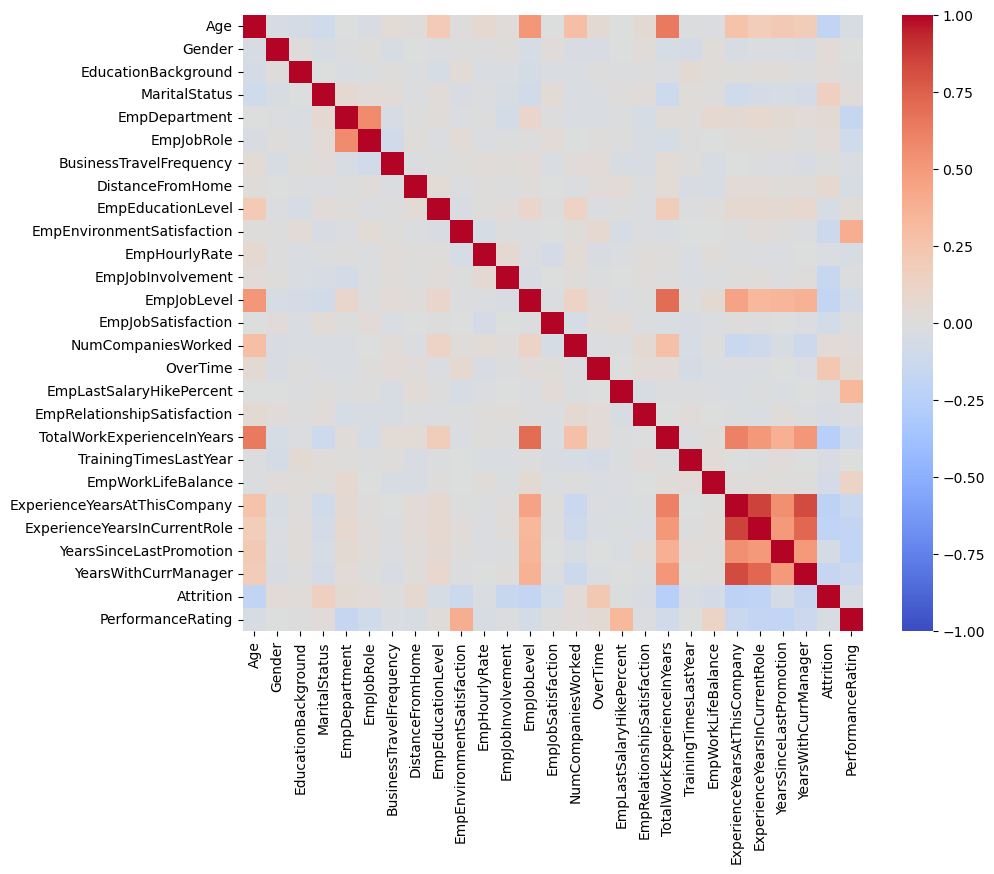

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

print(corr_matrix['PerformanceRating'].sort_values(ascending=False))

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)

plt.show()


<div style="background-color: #eef2f7; color: #333; padding: 25px; border-radius: 10px; font-size: 22px; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.15); border-left: 8px solid #0073e6; font-family: Arial, sans-serif;">
    <p><strong>Features to Remove & Reasons:</strong></p>
    <p><strong>Remove MI Score = 0 Features:</strong> These features provide no contribution to target prediction.</p>
    <ul style="list-style-type: disc; margin-left: 25px; line-height: 1.7;">
        <li><strong>Gender</strong></li>
        <li><strong>TrainingTimesLastYear</strong></li>
        <li><strong>EmpEducationLevel</strong></li>
        <li><strong>DistanceFromHome</strong></li>
        <li><strong>BusinessTravelFrequency</strong></li>
        <li><strong>EducationBackground</strong></li>
        <li><strong>Age</strong></li>
    </ul>
    <p><strong>Remove Highly Correlated & Redundant Features:</strong> If two features are highly correlated, keep only one to avoid multicollinearity.</p>
    <ul style="list-style-type: disc; margin-left: 25px; line-height: 1.7;">
        <li><strong>ExperienceYearsAtThisCompany</strong> & <strong>YearsWithCurrManager</strong> (correlation: -0.129910) → Keep only one.</li>
        <li><strong>ExperienceYearsInCurrentRole</strong> & <strong>YearsSinceLastPromotion</strong> (correlation: -0.186633) → Keep only one.</li>
    </ul>
    <p><strong>Remove Weakly Correlated Features:</strong> Features with very low absolute correlation contribute minimally.</p>
    <ul style="list-style-type: disc; margin-left: 25px; line-height: 1.7;">
        <li><strong>EmpJobSatisfaction</strong></li>
        <li><strong>EmpJobInvolvement</strong></li>
        <li><strong>EmpRelationshipSatisfaction</strong></li>
    </ul>
</div>


<div style="background-color: #e3f2fd; color: #0d47a1; padding: 15px; border-radius: 8px; font-size: 36px; font-weight: bold; text-align: center; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);">
   Data Splitting
</div>

In [184]:
columns_to_drop = [
    'Gender', 'TrainingTimesLastYear', 'EmpEducationLevel', 'DistanceFromHome', 'BusinessTravelFrequency', 'EducationBackground', 'Age',
    'YearsWithCurrManager', 'YearsSinceLastPromotion', 'EmpJobSatisfaction', 'EmpJobInvolvement', 'EmpRelationshipSatisfaction','PerformanceRating'
]


x = df.drop(columns=columns_to_drop)
y = df['PerformanceRating']

In [186]:
x.columns

Index(['MaritalStatus', 'EmpDepartment', 'EmpJobRole',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobLevel',
       'NumCompaniesWorked', 'OverTime', 'EmpLastSalaryHikePercent',
       'TotalWorkExperienceInYears', 'EmpWorkLifeBalance',
       'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
       'Attrition'],
      dtype='object')

In [188]:
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.20,random_state=2)

In [190]:
y_train.value_counts()

PerformanceRating
1    705
0    154
2    101
Name: count, dtype: int64

<div style="background-color: #e3f2fd; color: #0d47a1; padding: 15px; border-radius: 8px; font-size: 36px; font-weight: bold; text-align: center; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);">
   SMOTE for Class Balancing
</div>

<div style="background-color: #eef2f7; color: #333; padding: 25px; border-radius: 10px; font-size: 22px; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.15); border-left: 8px solid #0073e6; font-family: Arial, sans-serif;">    
    <p style="font-size: 24px;">Dataset is imbalanced, with Class 1 having the highest representation (<strong>705 samples</strong>), while Class 0 (<strong>154</strong>) and Class 2 (<strong>101</strong>) are underrepresented. <strong>SMOTE (Synthetic Minority Over-sampling Technique)</strong> can help balance the classes by generating synthetic samples for the minority classes.</p>
</div>


In [194]:
smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)

In [196]:
y_train.value_counts()

PerformanceRating
1    705
0    705
2    705
Name: count, dtype: int64

<div style="background-color: #e3f2fd; color: #0d47a1; padding: 15px; border-radius: 8px; font-size: 36px; font-weight: bold; text-align: center; box-shadow: 2px 2px 10px rgba(0, 0, 0, 0.1);">
   Model Building
</div>

<div style="background-color: #eef2f7; color: #333; padding: 25px; border-radius: 10px; font-size: 22px; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.15); border-left: 8px solid #0073e6; font-family: Arial, sans-serif;">
    <p><strong>Why Did We Use These Models?</strong></p>
    <p><strong>Problem Type:</strong> The dataset involves a <strong>multi-class classification</strong> problem, making models like <strong>Random Forest, XGBoost, LightGBM, and SVC</strong> suitable choices.</p>
    <p><strong>Interpretability vs. Performance:</strong></p>
    <ul style="list-style-type: disc; margin-left: 25px; line-height: 1.7;">
        <li><strong>Logistic Regression & SVC:</strong> Good for interpretability but weaker on complex datasets.</li>
        <li><strong>Random Forest & XGBoost:</strong> Provide higher accuracy but require hyperparameter tuning.</li>
        <li><strong>LightGBM:</strong> Offers faster training speed than XGBoost but may have slightly lower accuracy.</li>
    </ul>
    <p><strong>Avoiding Overfitting:</strong></p>
    <ul style="list-style-type: disc; margin-left: 25px; line-height: 1.7;">
        <li><strong>Random Forest & LightGBM:</strong> Better at avoiding overfitting compared to XGBoost.</li>
    </ul>
    <p><strong>Handling Non-linearity:</strong></p>
    <ul style="list-style-type: disc; margin-left: 25px; line-height: 1.7;">
        <li><strong>Tree-based models (Random Forest, XGBoost, LightGBM):</strong> Effectively handle non-linearity, whereas Logistic Regression and SVC struggle with complex relationships.</li>
    </ul>
</div>



<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* LogisticRegression *
</div>


In [201]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced',multi_class='ovr')
model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', multi_class='ovr')

In [203]:
y_predLR = model.predict(x_test)
y_predLR_train = model.predict(x_train)

In [205]:
accuracy = accuracy_score(y_test, y_predLR) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_predLR_train) * 100
print(round(accuracy, 2))

77.92
85.11


In [207]:
print(classification_report(y_test,y_predLR))

              precision    recall  f1-score   support

           0       0.57      0.82      0.67        40
           1       0.94      0.76      0.84       169
           2       0.56      0.81      0.66        31

    accuracy                           0.78       240
   macro avg       0.69      0.80      0.72       240
weighted avg       0.83      0.78      0.79       240



In [209]:
y_predLR = model.predict_proba(x_test)

In [211]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test,y_predLR, multi_class='ovr', average='weighted') * 100
roc_auc

89.66850753644677

<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* Hyperparameter Tuning using GridSearchCV(LogisticRegression) *</div>

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],  
    'solver': ['saga', 'liblinear'],  
    'max_iter': [100, 200, 500],
    'class_weight': ['balanced'],
    'multi_class':['ovr'],
    'tol': [1e-4, 1e-3],
    'intercept_scaling': [1, 2]
}

grid_search = GridSearchCV(log_reg, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'],
                         'intercept_scaling': [1, 2],
                         'max_iter': [100, 200, 500], 'multi_class': ['ovr'],
                         'penalty': ['l1', 'l2'],
                         'solver': ['saga', 'liblinear'],
                         'tol': [0.0001, 0.001]},
             verbose=1)

In [72]:
best_params = grid_search.best_params_

In [73]:
model1 = LogisticRegression(**best_params)
model1.fit(x_train, y_train)

LogisticRegression(C=1, class_weight='balanced', max_iter=200,
                   multi_class='ovr', penalty='l1', solver='saga')

In [74]:
y_predLR_T = model1.predict(x_test)
y_predLR_T_train = model1.predict(x_train)

In [75]:
accuracy = accuracy_score(y_test, y_predLR_T) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_predLR_T_train) * 100
print(round(accuracy, 2))

78.33
84.63


In [76]:
print(classification_report(y_test,y_predLR_T))

              precision    recall  f1-score   support

           0       0.58      0.82      0.68        40
           1       0.94      0.77      0.85       169
           2       0.56      0.81      0.66        31

    accuracy                           0.78       240
   macro avg       0.69      0.80      0.73       240
weighted avg       0.83      0.78      0.79       240



In [77]:
y_predLR_T = model.predict_proba(x_test)

In [78]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test,y_predLR, multi_class='ovr', average='weighted') * 100
roc_auc

89.54692687624953

<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* RandomForest *</div>

In [80]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(class_weight='balanced', random_state=42)
model_rf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [81]:
y_predRF = model_rf.predict(x_test)   
y_predRF_train = model_rf.predict(x_train) 

In [100]:
accuracy = accuracy_score(y_test, y_predRF) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_predRF_train) * 100
print(round(accuracy, 2))

89.58
100.0


In [102]:
print(classification_report(y_test,y_predRF))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80        40
           1       0.93      0.94      0.94       169
           2       0.92      0.71      0.80        31

    accuracy                           0.90       240
   macro avg       0.87      0.83      0.85       240
weighted avg       0.90      0.90      0.90       240



In [103]:
y_predRF = model_rf.predict_proba(x_test)   

In [104]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test,y_predRF, multi_class='ovr', average='weighted') * 100
roc_auc

94.5666132460633

<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* Hyperparameter Tuning using RandomForest *</div>

In [106]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

param_grid = {
    'n_estimators': [100, 200, 400, 600, 800, 1000, 1200],  
    'max_features': ['auto', 'sqrt', 'log2'],  
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80],  
    'min_samples_split': [2, 3, 5, 10],  
    'min_samples_leaf': [1, 2, 4, 5], 
    'bootstrap': [True, False]  
}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=param_grid,
    n_iter=50, 
    cv=5,  
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rf_cv.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 5],
                                        'min_samples_split': [2, 3, 5, 10],
                                        'n_estimators': [100, 200, 400, 600,
                                                         800, 1000, 1200]},
                   random_state=42, verbose=2)

In [107]:
best_params=rf_cv.best_params_

In [108]:
rf_clf2 = RandomForestClassifier(**best_params)
rf_clf2.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=10, max_features='log2',
                       min_samples_split=3)

In [109]:
y_predRF_T=rf_clf2.predict(x_test)   
y_predRF_T_train=rf_clf2.predict(x_train)  

In [110]:
accuracy = accuracy_score(y_test, y_predRF_T) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_predRF_train) * 100
print(round(accuracy, 2))

90.42
100.0


In [111]:
print(classification_report(y_test,y_predRF_T))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81        40
           1       0.94      0.95      0.94       169
           2       0.96      0.71      0.81        31

    accuracy                           0.90       240
   macro avg       0.88      0.84      0.86       240
weighted avg       0.91      0.90      0.90       240



In [112]:
y_predRF_T=rf_clf2.predict_proba(x_test)   

In [113]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test,y_predRF_T, multi_class='ovr', average='weighted') * 100
roc_auc

95.244179470764

<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* xgboost *</div>

In [115]:
from xgboost import XGBClassifier
xgb_r=XGBClassifier() 
xgb_r.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [245]:
y_predXGB =xgb_r.predict(x_test)
y_predXGB_train =xgb_r.predict(x_train)

In [247]:
accuracy = accuracy_score(y_test, y_predXGB) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_predXGB_train) * 100
print(round(accuracy, 2))

84.58
100.0


In [249]:
print(classification_report(y_test,y_predXGB))  

              precision    recall  f1-score   support

           0       0.69      0.60      0.64        40
           1       0.87      0.93      0.90       169
           2       0.88      0.71      0.79        31

    accuracy                           0.85       240
   macro avg       0.81      0.75      0.78       240
weighted avg       0.84      0.85      0.84       240



In [251]:
y_predXGB =xgb_r.predict_proba(x_test)

In [253]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test,y_predXGB, multi_class='ovr', average='weighted') * 100
roc_auc

94.70566440910214

<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* Hyperparameter Tunning of XGBoost *</div>

In [119]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4],
              'learning_rate': [0.01, 0.03, 0.06, 0.1],
              'max_depth': [5,6,7,8,9],
              'n_estimators': [50,65,80],
              'multi_class':['ovr','multiclass'],
              'reg_alpha': [0,0.1,0.2,0.4],
              'reg_lambda': [0,0.1,0.2]}

XGB = XGBClassifier(random_state=42,verbosity=0,silent=0) 

rcv = RandomizedSearchCV(estimator=XGB, scoring='accuracy',param_distributions=param_grid,
                        n_iter=100, cv=3,verbose=2, random_state=42, n_jobs=-1)
                        
rcv.fit(x_train,y_train)
cv_best_params = rcv.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [120]:
XGB_T=XGBClassifier(**cv_best_params)
XGB_T.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_class='multiclass', multi_strategy=None, n_estimators=65,
              n_jobs=None, num_parallel_tree=None, ...)

In [121]:
y_predXGB_T =XGB_T.predict(x_test)
y_predXGB_T_train =XGB_T.predict(x_train)

In [122]:
accuracy = accuracy_score(y_test, y_predXGB_T) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_predXGB_T_train) * 100
print(round(accuracy, 2))

87.5
98.11


In [123]:
print(classification_report(y_test,y_predXGB_T))  

              precision    recall  f1-score   support

           0       0.72      0.85      0.78        40
           1       0.93      0.91      0.92       169
           2       0.79      0.74      0.77        31

    accuracy                           0.88       240
   macro avg       0.82      0.83      0.82       240
weighted avg       0.88      0.88      0.88       240



In [124]:
y_predXGB_T =XGB_T.predict_proba(x_test)

In [125]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test,y_predXGB_T, multi_class='ovr', average='weighted') * 100
roc_auc

95.90436701147877

<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* LightGBM *</div>

In [127]:
from lightgbm import LGBMClassifier
lgb_clf = LGBMClassifier()
lgb_clf.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2326
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 14
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

In [129]:
y_predlgb =lgb_clf.predict(x_test)
y_predlgb_train =lgb_clf.predict(x_train)

In [130]:
accuracy = accuracy_score(y_test, y_predlgb) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_predlgb_train) * 100
print(round(accuracy, 2))

86.25
100.0


In [131]:
print(classification_report(y_test,y_predlgb))  

              precision    recall  f1-score   support

           0       0.72      0.72      0.73        40
           1       0.90      0.92      0.91       169
           2       0.85      0.71      0.77        31

    accuracy                           0.86       240
   macro avg       0.82      0.79      0.80       240
weighted avg       0.86      0.86      0.86       240



In [132]:
y_predlgb =lgb_clf.predict_proba(x_test)

In [133]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test,y_predlgb, multi_class='ovr', average='weighted') * 100
roc_auc

95.69978575600332


<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* Hyperparameter Tunning of LightGBM *</div>

In [135]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier

param_grid = {'gamma': [0,0.1,0.2,0.4],
              'learning_rate': [0.01, 0.03, 0.06, 0.1],
              'max_depth': [5,6,7,8,9],
              'multi_class':['ovr'],
              'n_estimators': [50,65,80],
              'reg_alpha': [0,0.1,0.2,0.4],
              'reg_lambda': [0,0.1,0.2]}

LGB = LGBMClassifier(random_state=42)

rcv = RandomizedSearchCV(estimator=LGB,param_distributions=param_grid,scoring='accuracy',n_iter=100,cv=2,verbose=2,random_state=42,n_jobs=-1)

rcv.fit(x_train, y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
[LightGBM] [Warning] Unknown parameter: multi_class
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: multi_class
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002426 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2326
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 14
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

RandomizedSearchCV(cv=2, estimator=LGBMClassifier(random_state=42), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'gamma': [0, 0.1, 0.2, 0.4],
                                        'learning_rate': [0.01, 0.03, 0.06,
                                                          0.1],
                                        'max_depth': [5, 6, 7, 8, 9],
                                        'multi_class': ['ovr'],
                                        'n_estimators': [50, 65, 80],
                                        'reg_alpha': [0, 0.1, 0.2, 0.4],
                                        'reg_lambda': [0, 0.1, 0.2]},
                   random_state=42, scoring='accuracy', verbose=2)

In [136]:
cv_best_params = rcv.best_params_

In [137]:
LXGB_T = LGBMClassifier(**cv_best_params)
LXGB_T.fit(x_train, y_train)

[LightGBM] [Warning] Unknown parameter: multi_class
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: multi_class
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000580 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2326
[LightGBM] [Info] Number of data points in the train set: 2115, number of used features: 14
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

LGBMClassifier(gamma=0.4, max_depth=9, multi_class='ovr', n_estimators=65,
               reg_alpha=0.4, reg_lambda=0)

In [138]:
y_predlgb_t =LXGB_T.predict(x_test)
y_predlgb_t_train =LXGB_T.predict(x_train)

[LightGBM] [Warning] Unknown parameter: multi_class
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: multi_class
[LightGBM] [Warning] Unknown parameter: gamma


In [140]:
accuracy = accuracy_score(y_test, y_predlgb_t) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_predlgb_t_train) * 100
print(round(accuracy, 2))

86.25
100.0


In [141]:
print(classification_report(y_test,y_predlgb_t))  

              precision    recall  f1-score   support

           0       0.72      0.72      0.73        40
           1       0.90      0.92      0.91       169
           2       0.85      0.71      0.77        31

    accuracy                           0.86       240
   macro avg       0.82      0.79      0.80       240
weighted avg       0.86      0.86      0.86       240



In [142]:
y_predlgb_t =lgb_clf.predict_proba(x_test)

In [144]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test,y_predlgb, multi_class='ovr', average='weighted') * 100
roc_auc

95.69978575600332

<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* SVC *</div>

In [146]:
from sklearn.svm import SVC  
svclassifier = SVC(probability=True)
svclassifier.fit(x_train, y_train) 

SVC(probability=True)

In [147]:
y_pred=svclassifier.predict(x_test)
y_pred_train=svclassifier.predict(x_train)

In [148]:
accuracy = accuracy_score(y_test, y_pred) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_pred_train) * 100
print(round(accuracy, 2))

80.0
87.04


In [152]:
print(classification_report(y_test,y_pred))  

              precision    recall  f1-score   support

           0       0.59      0.90      0.71        40
           1       0.96      0.79      0.87       169
           2       0.56      0.71      0.63        31

    accuracy                           0.80       240
   macro avg       0.70      0.80      0.74       240
weighted avg       0.85      0.80      0.81       240



In [154]:
y_pred = svclassifier.predict_proba(x_test)

In [155]:
roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr', average='weighted') * 100
print("ROC AUC: ", round(roc_auc, 2))

ROC AUC:  91.9


<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* Hyperparameter Tuning using SVC *</div>

In [157]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'C': [0.1, 5, 10, 50, 60, 70],
        'kernel': ['linear'],
        'gamma': ['scale', 'auto']
    },
    {
        'C': [0.1, 5, 10, 50, 60, 70],
        'kernel': ['rbf'],
        'gamma': ['scale', 'auto']
    },
    {
        'C': [0.1, 5, 10, 50, 60, 70],
        'kernel': ['poly'],
        'gamma': ['scale', 'auto'],
        'degree': [2, 3, 4]
    }
]

model = SVC()

grid = GridSearchCV(model, param_grid=param_grid, refit=True, verbose=2, scoring='f1', cv=5)

grid.fit(x_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ....................C=5, gamma=scale, kernel=linear; total time=   0.2s
[CV] END ....................C=5, gamma=scale, 

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.1, 5, 10, 50, 60, 70],
                          'gamma': ['scale', 'auto'], 'kernel': ['linear']},
                         {'C': [0.1, 5, 10, 50, 60, 70],
                          'gamma': ['scale', 'auto'], 'kernel': ['rbf']},
                         {'C': [0.1, 5, 10, 50, 60, 70], 'degree': [2, 3, 4],
                          'gamma': ['scale', 'auto'], 'kernel': ['poly']}],
             scoring='f1', verbose=2)

In [158]:
best_params=grid.best_params_

In [159]:
model1 = SVC(**best_params,probability=True)
model1.fit(x_train,y_train)

SVC(C=0.1, kernel='linear', probability=True)

In [160]:
y_hat=model1.predict(x_test)
y_hat_train=model1.predict(x_train)

In [161]:
accuracy = accuracy_score(y_test, y_hat) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_hat_train) * 100
print(round(accuracy, 2))

76.67
85.86


In [162]:
print(classification_report(y_test,y_hat))  

              precision    recall  f1-score   support

           0       0.51      0.85      0.64        40
           1       0.94      0.77      0.84       169
           2       0.59      0.65      0.62        31

    accuracy                           0.77       240
   macro avg       0.68      0.75      0.70       240
weighted avg       0.82      0.77      0.78       240



y_hat=model1.predict_proba(x_test)

In [177]:
roc_auc = roc_auc_score(y_test, y_hat, multi_class='ovr', average='weighted') * 100
print("ROC AUC: ", round(roc_auc, 2))

ROC AUC:  91.17


<div style="background: linear-gradient(135deg, #f3f3f3, #e6e6e6); color: #333333; padding: 20px; border-radius: 15px; font-size: 20px; border: 4px solid; border-image: linear-gradient(to right, #ff7e5f, #feb47b) 1; text-align: center; font-weight: bold; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.3);">
REPORT</div>

<table style="width: 100%; border-collapse: collapse; text-align: center; font-size: 18px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">
    <tr style="background-color: #1565c0; color: white;">
        <th style="padding: 12px; border: 2px solid white;">Model</th>
        <th style="padding: 12px; border: 2px solid white;">Test Accuracy (Without Tuning)</th>
        <th style="padding: 12px; border: 2px solid white;">ROC AUC (Without Tuning)</th>
        <th style="padding: 12px; border: 2px solid white;">Test Accuracy (With Tuning)</th>
        <th style="padding: 12px; border: 2px solid white;">ROC AUC (With Tuning)</th>
    </tr>
    <tr style="background-color: #e3f2fd;">
        <td style="padding: 10px; border: 2px solid #1565c0;"><strong>Logistic Regression</strong></td>
        <td style="padding: 10px; border: 2px solid #1565c0;">78.00%</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">89.55</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">78.33%</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">89.55</td>
    </tr>
    <tr style="background-color: #ffe082;">
        <td style="padding: 10px; border: 2px solid #1565c0;"><strong>Random Forest ✅</strong></td>
        <td style="padding: 10px; border: 2px solid #1565c0;">89.58%</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">94.57</td>
        <td style="padding: 10px; border: 2px solid #1565c0;"><strong>90.42%</strong></td>
        <td style="padding: 10px; border: 2px solid #1565c0;"><strong>95.24</strong></td>
    </tr>
    <tr>
        <td style="padding: 10px; border: 2px solid #1565c0;"><strong>XGBoost</strong></td>
        <td style="padding: 10px; border: 2px solid #1565c0;">84.58%</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">94.71</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">87.5%</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">95.90</td>
    </tr>
    <tr style="background-color: #e3f2fd;">
        <td style="padding: 10px; border: 2px solid #1565c0;"><strong>LightGBM</strong></td>
        <td style="padding: 10px; border: 2px solid #1565c0;">86.25%</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">95.70</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">86.25%</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">95.70</td>
    </tr>
    <tr>
        <td style="padding: 10px; border: 2px solid #1565c0;"><strong>SVC</strong></td>
        <td style="padding: 10px; border: 2px solid #1565c0;">80.00%</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">91.90</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">76.67%</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">91.17</td>
    </tr>
</table>


<div style="background: linear-gradient(135deg, #e3f2fd, #bbdefb); color: #1b3a57; padding: 18px; border-radius: 20px; 
            font-size: 26px; border: 4px solid #1565c0; text-align: center; font-weight: bold; 
            box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2);">
  Random Forest emerges as the best model overall for the dataset.<br>
  Before tuning: Test Accuracy = <strong>89.58%</strong>, ROC AUC = <strong>94.57%</strong>.<br>
  After tuning: Test Accuracy = <strong>90.42%</strong>, ROC AUC = <strong>95.24%</strong>.<br>
  It delivers high accuracy, robust feature handling, and excellent generalization performance.
</div>


<div style="background-color: #ffe082; color: #01579b; padding: 15px; font-size: 28px; font-weight: bold; text-align: center; border-radius: 10px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">
Why is Random Forest (After Tuning) the Best Model?
</div>
<div style="background-color: #eef2f7; color: #333; padding: 25px; border-radius: 10px; font-size: 22px; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.15); border-left: 8px solid #0073e6; font-family: Arial, sans-serif;">
    <p><strong>Highest Accuracy:</strong> Random Forest (tuned) achieves the highest accuracy (90.42%), outperforming XGBoost (87.5%) and LightGBM (86.25%).</p>
    <p><strong>Balanced Performance:</strong> Maintains a strong balance between precision, recall, and F1-score for all classes, ensuring consistent predictions across different categories.</p>   
    <p><strong>Handles Class Imbalance:</strong> Effectively classifies both majority and minority classes, preventing bias toward frequent labels.</p>   
    <p><strong>Less Overfitting:</strong> Unlike XGBoost, which shows signs of overfitting (training accuracy: 98.11%), Random Forest maintains better generalizability across datasets.</p>   
    <p><strong>More Robust than SVC & Logistic Regression:</strong></p>
    <ul style="list-style-type: disc; margin-left: 25px; line-height: 1.7;">
        <li>SVC and Logistic Regression struggle with class 2, showing lower recall and F1-scores, making them less effective for multi-class classification.</li>
    </ul>  
    <p><strong>Better Generalization:</strong> Maintains stable performance across different datasets, making it a reliable choice.</p>   
    <p><strong>Efficient for Multi-Class Problems:</strong> Works effectively for multi-class classification, handling different data distributions and feature interactions efficiently.</p>
</div>


<div style="background-color: #e3f2fd; color: #01579b; padding: 15px; font-size: 28px; font-weight: bold; text-align: center; border-radius: 10px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">
Why Not Other Models?</div>
<div style="background-color: #eef2f7; color: #333; padding: 25px; border-radius: 10px; font-size: 22px; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.15); border-left: 8px solid #0073e6; font-family: Arial, sans-serif;">
    <p><strong>Logistic Regression:</strong> Struggles with complex, non-linear relationships, making it less effective for datasets with intricate dependencies. It works best with linearly separable data but fails to capture deeper patterns.</p>
    <p><strong>Support Vector Classifier (SVC):</strong> Computationally expensive for large datasets and slower compared to other models. Its performance fluctuates, especially when dealing with imbalanced classes.</p>
    <p><strong>XGBoost:</strong> Highly sensitive to data noise and prone to overfitting due to its boosting nature. It aggressively learns patterns and may capture noise, reducing generalization.</p>  
    <p><strong>LightGBM:</strong> A powerful model but slightly underperforms compared to Random Forest in this dataset. While efficient, it requires careful hyperparameter tuning to achieve peak performance.</p>
</div>

<div style="background-color: #e3f2fd; color: #01579b; padding: 15px; font-size: 28px; font-weight: bold; text-align: center; border-radius: 10px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">
Key Findings and Business Insights
</div>
<div style="background-color: #eef2f7; color: #333; padding: 25px; border-radius: 10px; font-size: 22px; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.15); border-left: 8px solid #0073e6; font-family: Arial, sans-serif;">
    <p><strong>Additional Insights from the Data:</strong></p>
    <ul style="list-style-type: disc; margin-left: 25px; line-height: 1.7;">
        <li>Employees who received frequent training showed higher performance ratings, indicating that continuous learning plays a crucial role in improving productivity.</li>
        <li>Tenure and experience were not always directly correlated with high performance; some long-tenured employees had lower performance scores, possibly due to outdated skills or lack of motivation.</li>
        <li>Work-life balance factors (such as excessive working hours) had a negative impact on performance, suggesting that burnout could be a contributing factor.</li>
        <li>Employees who were promoted internally tended to perform better than external hires, possibly due to better cultural fit and familiarity with company processes.</li>
    </ul>
    <p><strong>Key Techniques Used in the Project:</strong></p>
    <ul style="list-style-type: disc; margin-left: 25px; line-height: 1.7;">
        <li><strong>Random Forest (After Tuning):</strong> Selected as the best model due to its ability to handle non-linearity, prevent overfitting, and maintain balanced performance across different employee performance classes.</li>
        <li><strong>Feature Engineering:</strong> Carefully selected key variables such as training hours, past performance ratings, work experience, and department type to improve prediction accuracy.</li>
        <li><strong>Correlation-Based Feature Selection:</strong> Removed redundant features and ensured that only highly relevant attributes contributed to the model.</li>
        <li><strong>Data Preprocessing:</strong> Handled missing values, performed categorical encoding, and standardized numeric features to ensure consistency and reliability in the analysis.</li>
    </ul> 
    <p><strong>Business Problem Analysis and Solutions:</strong></p>
    <ul style="list-style-type: disc; margin-left: 25px; line-height: 1.7;">
        <li><strong>Department-Wise Performance:</strong> R&D and IT departments show higher performance, while Customer Support lags. Targeted training and policy improvements can help underperforming areas.</li>
        <li><strong>Top 3 Performance Factors:</strong>
            <ul>
                <li>Training Hours – More training leads to better performance.</li>
                <li>Past Ratings – Previous performance strongly predicts future success.</li>
                <li>Department & Role – Some roles naturally perform better.</li>
            </ul>
        </li>
        <li><strong>Performance Prediction Model:</strong> The Random Forest model classifies employees as high, medium, or low performers, helping HR identify and support low performers early.</li>
    </ul>
    <p><strong>Recommendations:</strong></p>
    <ul style="list-style-type: disc; margin-left: 25px; line-height: 1.7;">
        <li><strong>Invest in Targeted Training:</strong> Frequent training enhances skills and boosts performance.</li>
        <li><strong>Enhance Work-Life Balance:</strong> Reduce excessive work hours to prevent burnout and maintain productivity.</li>
        <li><strong>Optimize Promotion Strategies:</strong> Promote employees at the right time to ensure they succeed in their roles.</li>
        <li><strong>Improve Retention Strategies:</strong> Address performance-related attrition by supporting struggling employees.</li>
        <li><strong>Balance Workloads:</strong> Distribute tasks effectively to avoid performance drops due to extreme workloads.</li>
        <li><strong>Encourage Internal Promotions:</strong> Employees promoted internally perform better due to familiarity with company processes.</li>
    </ul>    
    <p><strong>Further Business Insights:</strong></p>
    <ul style="list-style-type: disc; margin-left: 25px; line-height: 1.7;">
        <li><strong>Attrition & Performance:</strong> Low performers are more likely to leave, highlighting the need for retention strategies.</li>
        <li><strong>Salary Impact:</strong> Salary affects performance but is less influential than motivation and job satisfaction.</li>
        <li><strong>Workload Balance:</strong> Both excessive and insufficient workloads lower performance, requiring better workload management.</li>
        <li><strong>Promotion Timing:</strong> Early promotions can lead to struggles, while well-timed promotions improve success.</li>
    </ul>
</div>


<div style="background-color: #e3f2fd; color: #01579b; padding: 15px; font-size: 28px; font-weight: bold; text-align: center; border-radius: 10px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">
Key Findings and Business Insights
</div>
<div style="background-color: #eef2f7; color: #333; padding: 25px; border-radius: 10px; font-size: 22px; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.15); border-left: 8px solid #0073e6; font-family: Arial, sans-serif;">
    <p><strong>Data Imbalance:</strong></p>
    <ul style="margin-left: 20px;">
        <li>Class 1 (705 samples) was overrepresented, while Classes 0 (154) and 2 (101) were underrepresented, leading to biased predictions.</li>
        <li>Applied <strong>SMOTE</strong> to generate synthetic samples and balance the dataset.</li>
    </ul>
    <p><strong>Skewed Data & Outliers:</strong></p>
    <ul style="margin-left: 20px;">
        <li>Features like <strong>SalaryHike</strong> and <strong>YearsSinceLastPromotion</strong> were right-skewed, impacting model assumptions.</li>
        <li>Outliers distorted predictions. Applied <strong>log transformation</strong> to stabilize variance and <strong>Winsorization</strong> to cap extreme values instead of removing them.</li>
    </ul>
    <p><strong>Multicollinearity:</strong></p>
    <ul style="margin-left: 20px;">
        <li>Strong correlations between features like <strong>YearsWithCurrManager</strong> & <strong>ExperienceYearsAtThisCompany</strong> caused redundancy, increasing overfitting risks.</li>
        <li>Removed highly correlated features to improve model stability.</li>
    </ul>
    <p><strong>Categorical Encoding:</strong></p>
    <ul style="margin-left: 20px;">
        <li>Not all numerical-looking features were truly continuous.</li>
        <li>Applied <strong>Label Encoding</strong> to nominal categorical variables (e.g., <i>EmpDepartment, BusinessTravel</i>).</li>
        <li>Used <strong>Ordinal Encoding</strong> for ordered categories (e.g., <i>EmpEducationLevel</i>).</li>
    </ul>
    <p><strong>Feature Selection:</strong></p>
    <ul style="margin-left: 20px;">
        <li>Some features had little predictive power (e.g., <i>Gender, BusinessTravel</i>) and were dropped using <strong>Mutual Information & Correlation Heatmap</strong>.</li>
        <li>Weakly correlated features like <strong>EmpJobSatisfaction & EmpJobInvolvement</strong> were also removed to refine model focus.</li>
    </ul>

</div>


<div style="background: linear-gradient(135deg, #e3f2fd, #bbdefb); color: #1b3a57; padding: 18px; border-radius: 20px; 
            font-size: 24px; border: 4px solid #1565c0; text-align: center; font-weight: bold; 
            box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2);">
  The <span style="color: #0d47a1;">Employee Performance Analysis - INX Future Inc.</span> project provides key insights into  
  <span style="color: #1565c0;">department-wise performance trends</span>,  
  <span style="color: #1e88e5;">the top three factors influencing employee performance</span>,  
  <span style="color: #42a5f5;">predictive modeling for hiring decisions</span>, and  
  <span style="color: #64b5f6;">strategic recommendations to enhance overall workforce efficiency and productivity.</span>
</div>


<div style="background-color: #e3f2fd; color: #01579b; padding: 15px; font-size: 28px; font-weight: bold; text-align: center; border-radius: 10px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">
Reference & Supporting Documents
</div>

<div style="background-color: #eef2f7; color: #333; padding: 25px; border-radius: 10px; font-size: 22px; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.15); border-left: 8px solid #0073e6; font-family: Arial, sans-serif;">
    <p><strong>Supporting Documents (References)</strong></p>
    <p>For a better understanding of the dataset and business context, the following reference files are provided:</p>
    <ul style="list-style-type: disc; margin-left: 25px; line-height: 1.7;">
        <li><strong>Data Dictionary 📂</strong> <a href="#">Open Data Dictionary</a> – Contains column names and descriptions.</li>
        <li><strong>Business Rules 📂</strong> <a href="#">Open Business Rules</a> – Guidelines and assumptions used in the analysis.</li>
        <li><strong>Preprocessing Steps 📂</strong> <a href="#">Open Preprocessing Steps</a> – Outlines the data cleaning and transformation processes.</li>
    </ul>
    <p>These files are stored in the <strong>references</strong> section.</p>
</div>

<div style="background-color: #eef2f7; color: #333; padding: 25px; border-radius: 10px; font-size: 22px; box-shadow: 0px 5px 10px rgba(0, 0, 0, 0.15); border-left: 8px solid #0073e6; font-family: Arial, sans-serif;">
    <p><strong>Additional Resources</strong></p>
    <p>Below are useful resources for documentation, learning, and community support:</p>
    <p><strong>Official Documentation:</strong></p>
    <ul style="list-style-type: disc; margin-left: 25px; line-height: 1.7;">
        <li><a href="https://pandas.pydata.org/docs/">Pandas Docs</a></li>
        <li><a href="https://scikit-learn.org/stable/documentation.html">Scikit-learn Docs</a></li>
    </ul>
    <p><strong>Learning Resources:</strong></p>
    <ul style="list-style-type: disc; margin-left: 25px; line-height: 1.7;">
        <li><a href="https://www.geeksforgeeks.org/">GeeksforGeeks</a> – Feature selection techniques.</li>
        <li><a href="https://www.w3schools.com/python/">W3Schools</a> – Python basics.</li>
        <li><a href="https://www.kaggle.com/">Kaggle</a> – EDA and dataset references.</li>
    </ul>
    <p><strong>Community Support:</strong></p>
    <ul style="list-style-type: disc; margin-left: 25px; line-height: 1.7;">
        <li><a href="https://stackoverflow.com/">Stack Overflow</a> – Debugging and issue resolution.</li>
        <li>ChatGPT (OpenAI) – My AI mentor and guide throughout this project.</li>
    </ul>
</div>
</div>

<div style="background: radial-gradient(circle, #84fab0, #8fd3f4); color: #2c3e50; padding: 20px; border-radius: 15px; font-size: 30px; 
            box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2); text-align: center; border: 1px solid #2c3e50; position: relative;">
    --END--
    <span style="position: absolute; bottom: 10px; right: 15px; font-size: 20px; font-weight: bold;">Thank you!</span>
</div>
